# Simulation of the p53–Mdm2 Gene Regulatory Circuit Using a System of Ordinary Differential Equations (ODEs)

## Project Goal:
The aim is to create a mathematical model of the gene regulatory feedback loop between p53 and Mdm2 and simulate its time dynamics under different conditions, such as DNA damage. The model will be based on a system of ODEs describing the concentrations of phosphorylated and unphosphorylated p53 and Mdm2 over time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks

from tools import check_for_apoptosis_comprehensive, count_p53_pulses_and_check_apoptosis,  plot_p53_mdm2_simulation
from Eqs import p53_mdm2_system_combined_damage



## Basic Model Structure:

In [ ]:
# import your cell
from Cells import BasicCell
# import your environment
from Environments import BasicEnvironment


cell = BasicCell()
env = BasicEnvironment()

# set the parameters for the cell and environment
params_cell = cell.params
params_env = env.params
params_combined = {**params_cell, **params_env}

In [3]:
y0_combined = [0.07, 0.02, 0.01, 0.12, 0.01, 0.33, 0.0, 0.0] # Includes DNAdam_UV initial

# ---------------------------------------------------------------------------
# 3. SIMULATIONS
# ---------------------------------------------------------------------------

# --- A) Main Simulation for Time-Series Plots (Subplots A, B, C, E, F) ---
params_combined = params_combined.copy()

t_span_main_sim = (0, 1200)
t_eval_main_sim = np.linspace(*t_span_main_sim, 2401)

sol_main = solve_ivp(
    p53_mdm2_system_combined_damage, t_span_main_sim, y0_combined,
    t_eval=t_eval_main_sim, args=(params_combined,), method='LSODA',
    rtol=1e-6, atol=1e-9
)

Environment Information:
UV Start: 0, UV End: 0, UV Amplitude: 0.0
IR Start: 10, IR End: 20, IR Amplitude: 1.0
Cell information:
No apoptosis triggered in main simulation.


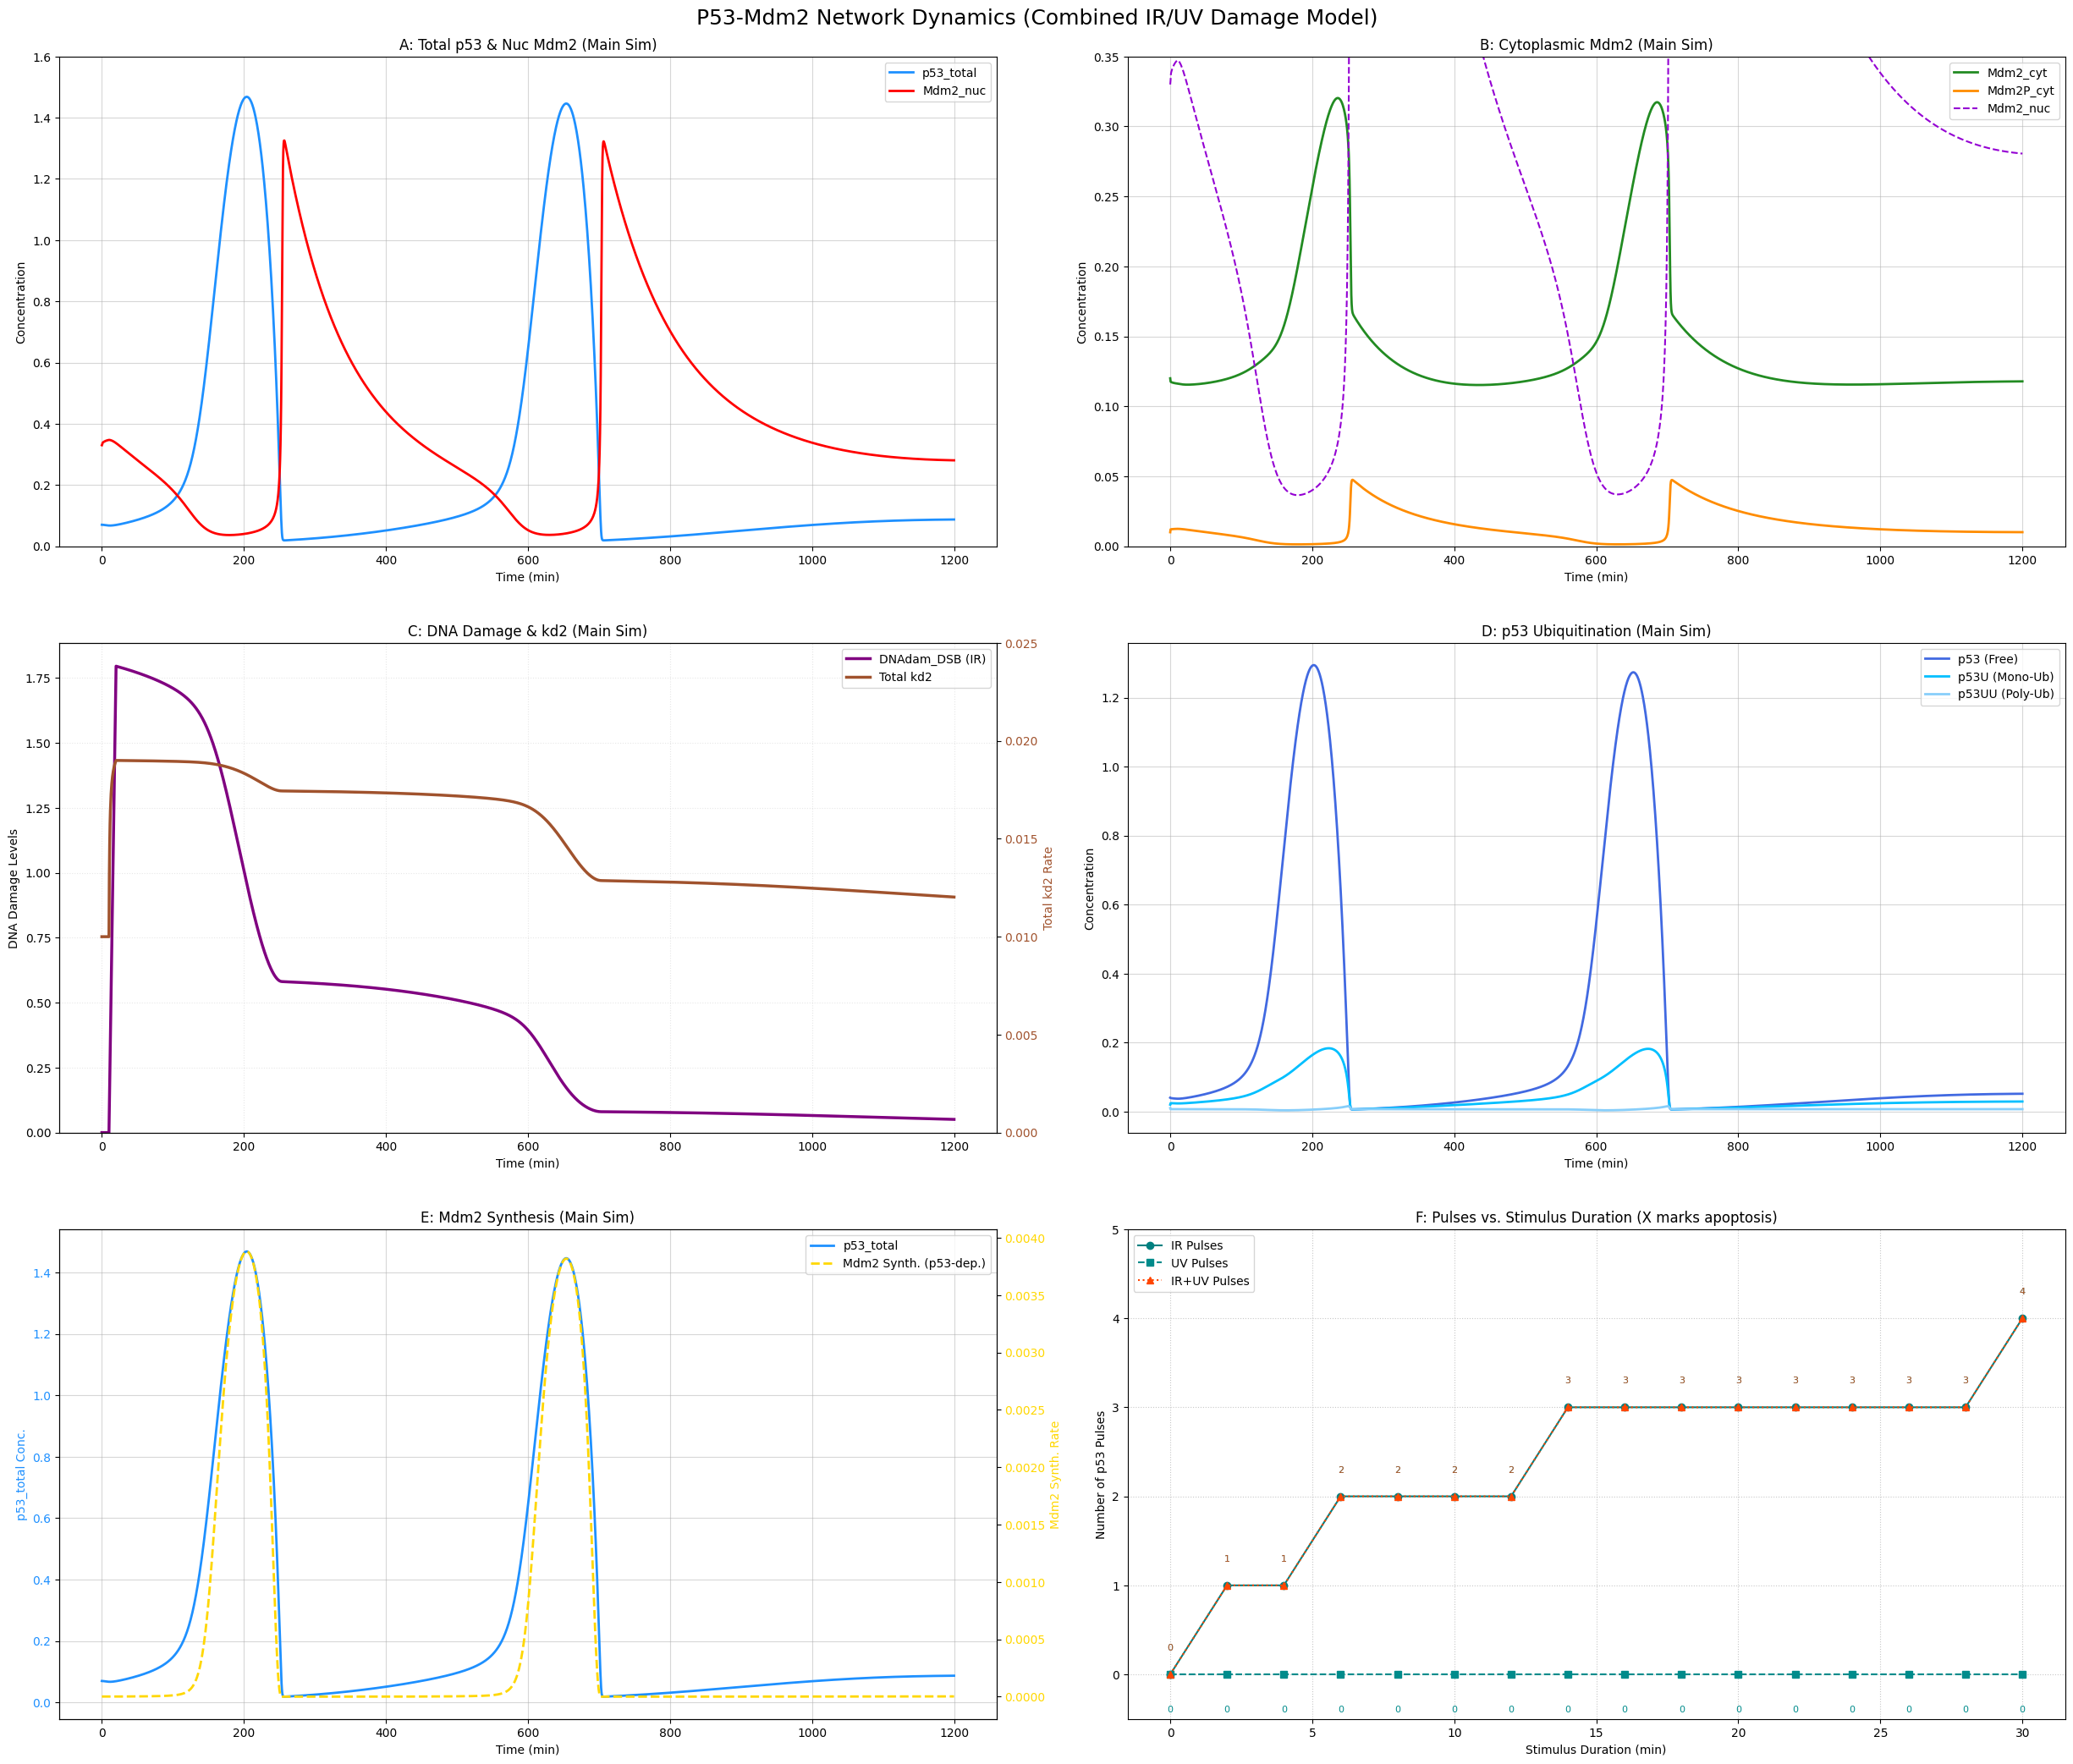

In [4]:
plot_p53_mdm2_simulation(
    sol_main=sol_main,
    params_combined=params_combined,
    y0_combined=y0_combined,
    t_span_main_sim=t_span_main_sim,
    t_eval_main_sim=t_eval_main_sim,
)

## Advanced Model:

In [5]:
from Eqs import p53_full_system
from tools import plot_p53_full_simulation


In [6]:
def simulate(cell, env, y0_full_system):
    params_cell = cell.params
    params_env = env.params
    params_for_main_run = {**params_cell, **params_env}

    t_span_main_sim = (0, 1200)
    t_eval_main_sim = np.linspace(*t_span_main_sim, 2401)

    sol_main = solve_ivp(
        p53_full_system, t_span_main_sim, y0_full_system,
        t_eval=t_eval_main_sim, args=(params_for_main_run,), method='LSODA',
        rtol=1e-6, atol=1e-9
    )

    
    params_full_system = params_for_main_run.copy()
    t_sim_end_pulse_scan = 1500
    t_eval_pulse_scan_data = np.linspace(0, t_sim_end_pulse_scan, t_sim_end_pulse_scan * 2 + 1)
    stimulus_durations_data = np.concatenate(([0], np.arange(0, 32, 2)))
    results_ir = [count_p53_pulses_and_check_apoptosis(d, 'IR', params_full_system, y0_full_system, (0,t_sim_end_pulse_scan), t_eval_pulse_scan_data, p53_full_system, factor=True) for d in stimulus_durations_data]
    p_counts_ir = [r[0] for r in results_ir]; a_flags_ir = [r[1] for r in results_ir]
    results_uv = [count_p53_pulses_and_check_apoptosis(d, 'UV', params_full_system, y0_full_system, (0,t_sim_end_pulse_scan), t_eval_pulse_scan_data, p53_full_system, factor=True) for d in stimulus_durations_data]
    p_counts_uv = [r[0] for r in results_uv]; a_flags_uv = [r[1] for r in results_uv]
    results_both = [count_p53_pulses_and_check_apoptosis(d, 'BOTH', params_full_system, y0_full_system, (0,t_sim_end_pulse_scan), t_eval_pulse_scan_data, p53_full_system, factor=True) for d in stimulus_durations_data]
    p_counts_both = [r[0] for r in results_both]; a_flags_both = [r[1] for r in results_both]


    plot_p53_full_simulation(
        sol_main=sol_main,
        params_used_for_sol_main=params_for_main_run,
        stimulus_durations_scan=stimulus_durations_data,
        pulse_counts_ir_scan=p_counts_ir,
        apoptosis_flags_ir_scan=a_flags_ir,
        pulse_counts_uv_scan=p_counts_uv,
        apoptosis_flags_uv_scan=a_flags_uv,
        pulse_counts_both_scan=p_counts_both,
        apoptosis_flags_both_scan=a_flags_both,
        save_fig = True,
        cell_type=cell.name,
    )
    

Running simulation with AdvancedCell
A baseline cell model with a fully functional p53-Mdm2 regulatory network, 
DNA damage response pathways (ATM/ATR), and downstream effectors like p21, Wip1, 
and an apoptotic factor. Represents a typical, healthy, non-specialized 
mammalian cell capable of DNA repair, cell cycle arrest, and apoptosis.


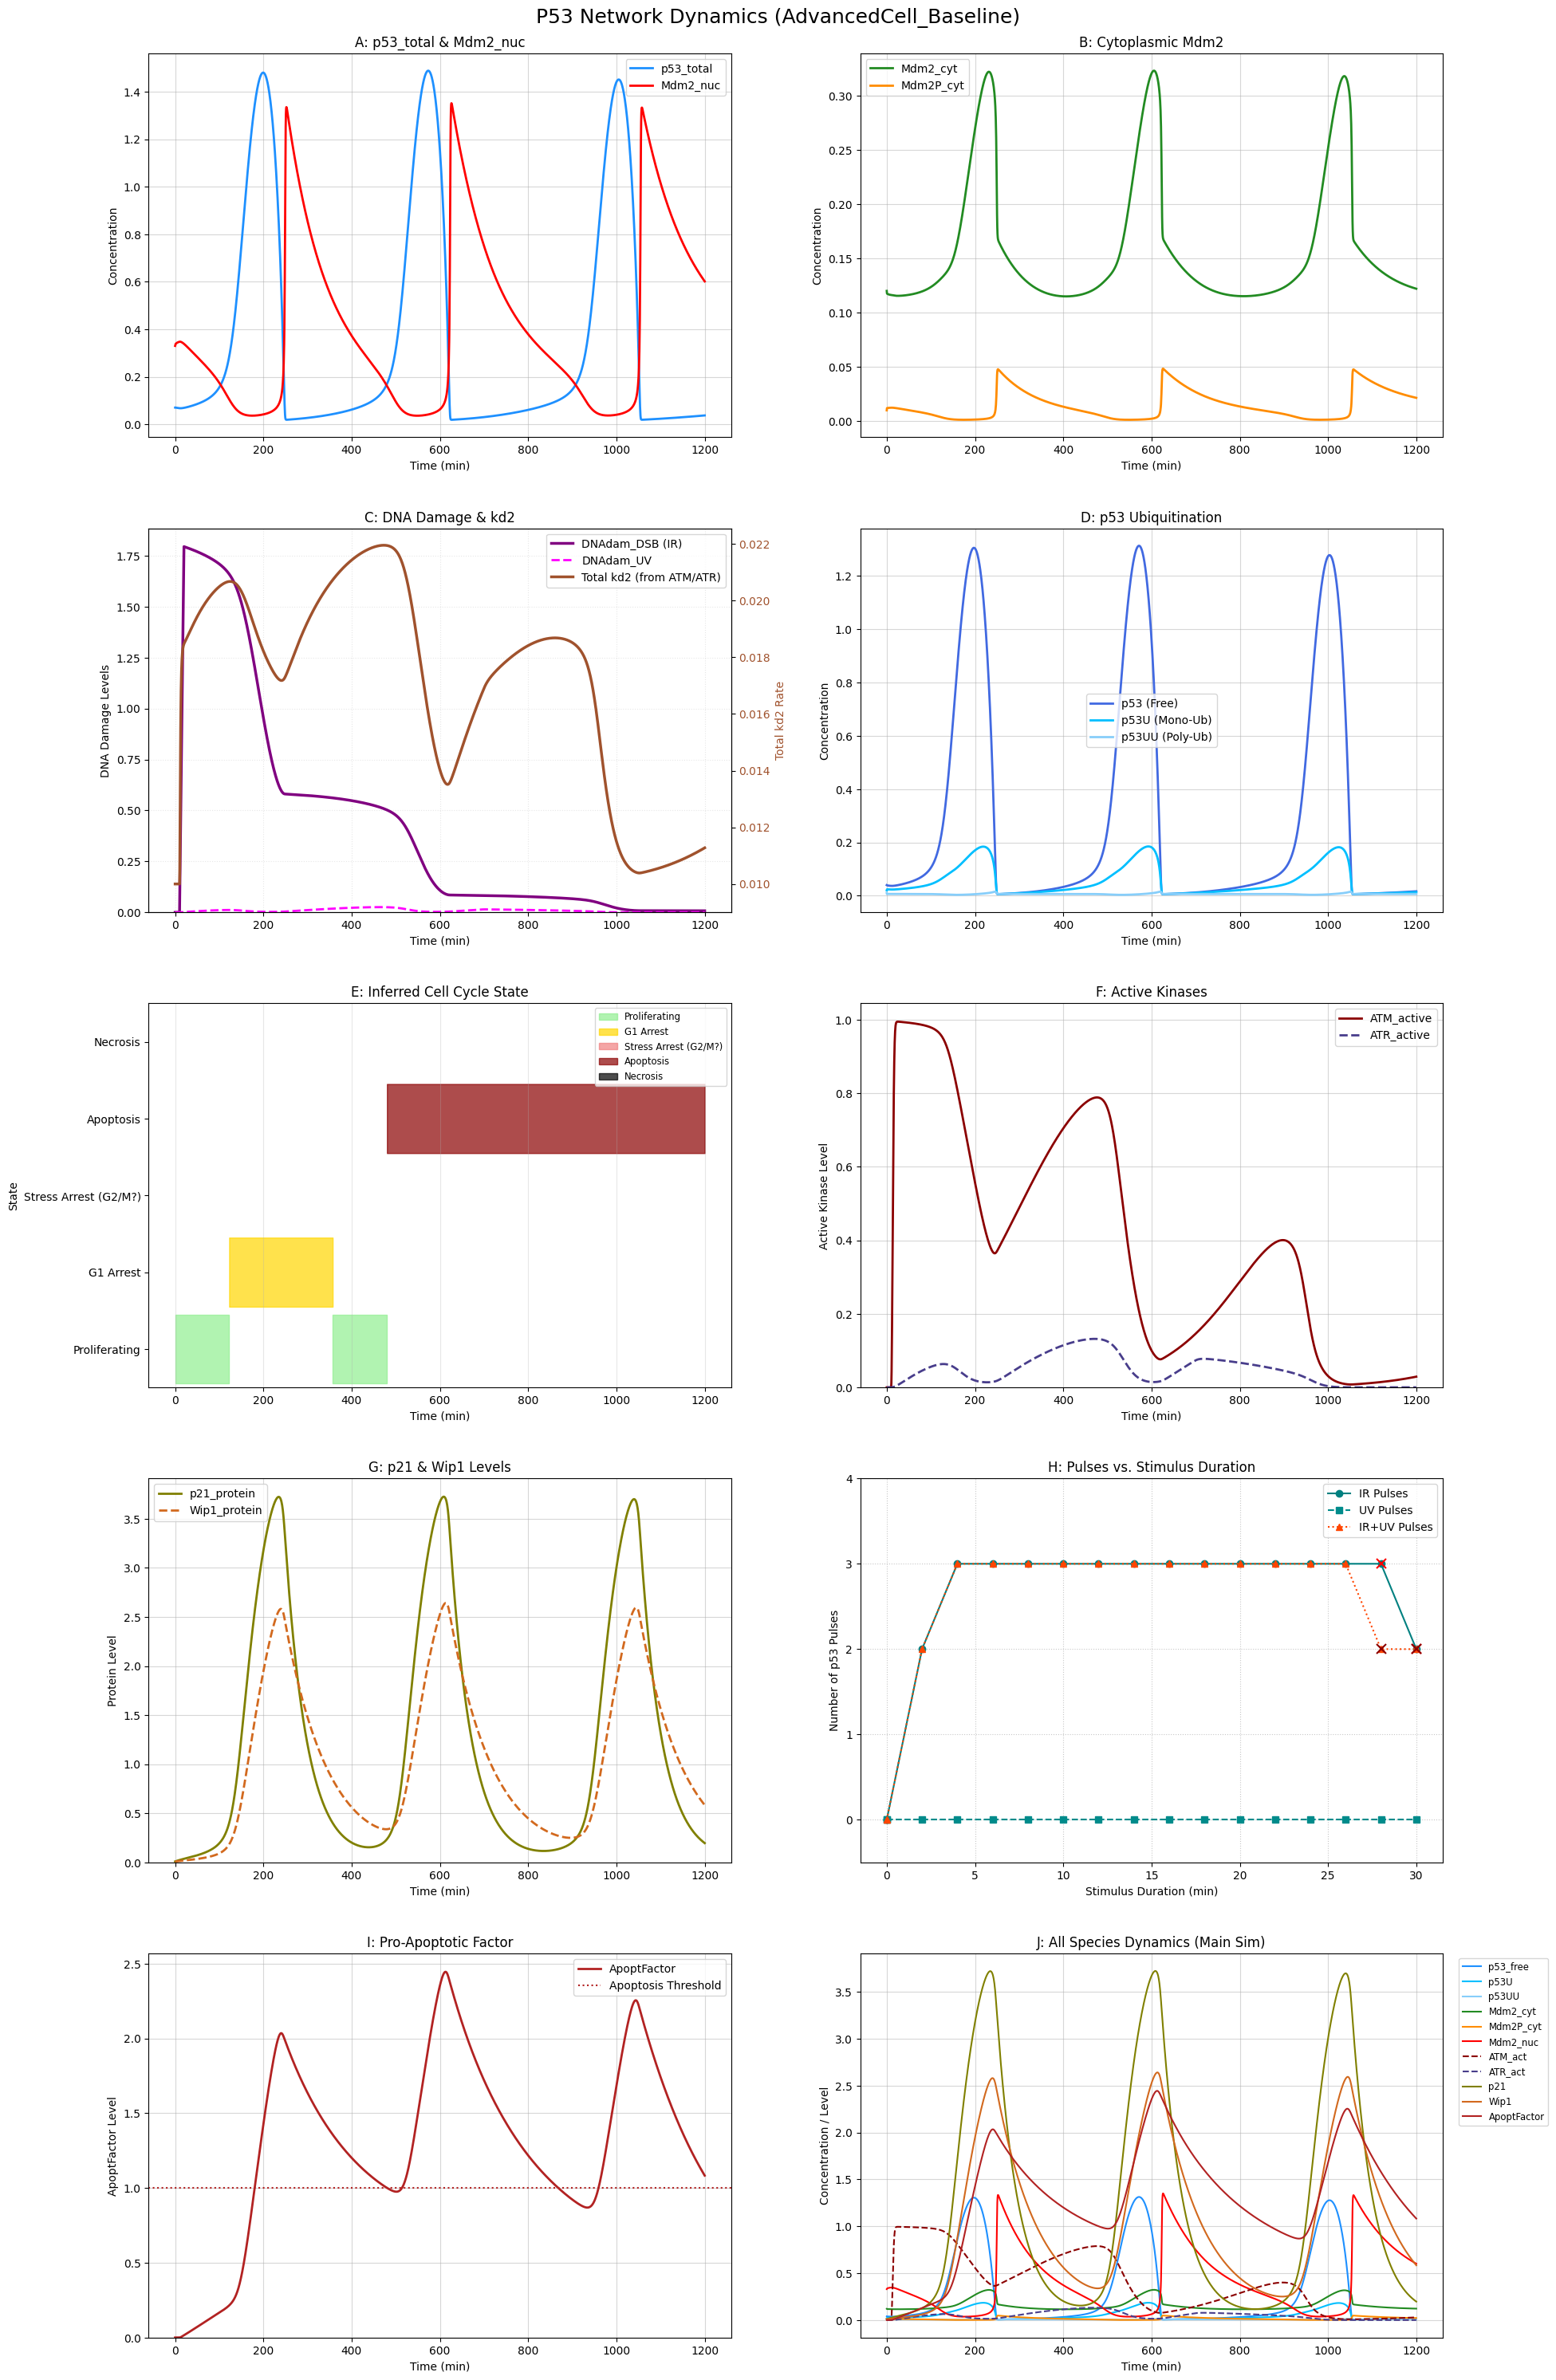

Environment Information:
UV Start: 10, UV End: 700, UV Amplitude: 0.001
IR Start: 10, IR End: 20, IR Amplitude: 1.0
Cell information (Main Simulation):
Apoptosis triggered at time: 480.00 minutes
Reason for apoptosis: Factor_duration_met


<Figure size 640x480 with 0 Axes>

Figure saved as 'p53_full_simulation_AdvancedCell_Baseline.png'.


In [ ]:
from Cells import AdvancedCell, MonocyteCell, SenescentCell, ErythrocyteCell, UVResistantCell, CancerCellp53Mutant, StemCellEmbryonic, CancerCellRestoredp53, RadioresistantCancerCell, FibroblastCell, MelanocyteCell
from Cells import HepatocyteCell, NeuronCell
from Environments import AdvancedEnvironment
from Eqs import p53_full_system
from tools import plot_p53_full_simulation

cell = AdvancedCell()
env = AdvancedEnvironment()

params_cell = cell.params
params_env = env.params
#params_cell["kd2_"] = 0.009884
params_for_main_run = {**params_cell, **params_env}


y0_full_system = [
    0.07,  # p53_tot
    0.02,  # p53U
    0.01,  # p53UU
    0.12,  # Mdm2_cyt
    0.01,  # Mdm2P_cyt
    0.33,  # Mdm2_nuc
    0.0,   # DNAdam_DSB
    0.0,   # DNAdam_UV
    0.0,   # ATM_active
    0.0,   # ATR_active
    0.01,  # p21_protein
    0.01,  # Wip1_protein
    0.0    # ApoptFactor (NEW)
] 

print("Running simulation with AdvancedCell")
for row in cell.description:
    print(row)
simulate(cell, env, y0_full_system)




Running simulation with MonocyteCell
Models a monocyte, an immune cell typically in G0/G1, as an AdvancedCell. Exhibits robust DNA damage 
sensing and kinase activation, potentially strong p53 stabilization, efficient 
p21 induction for cell cycle arrest, and a moderate apoptosis threshold.


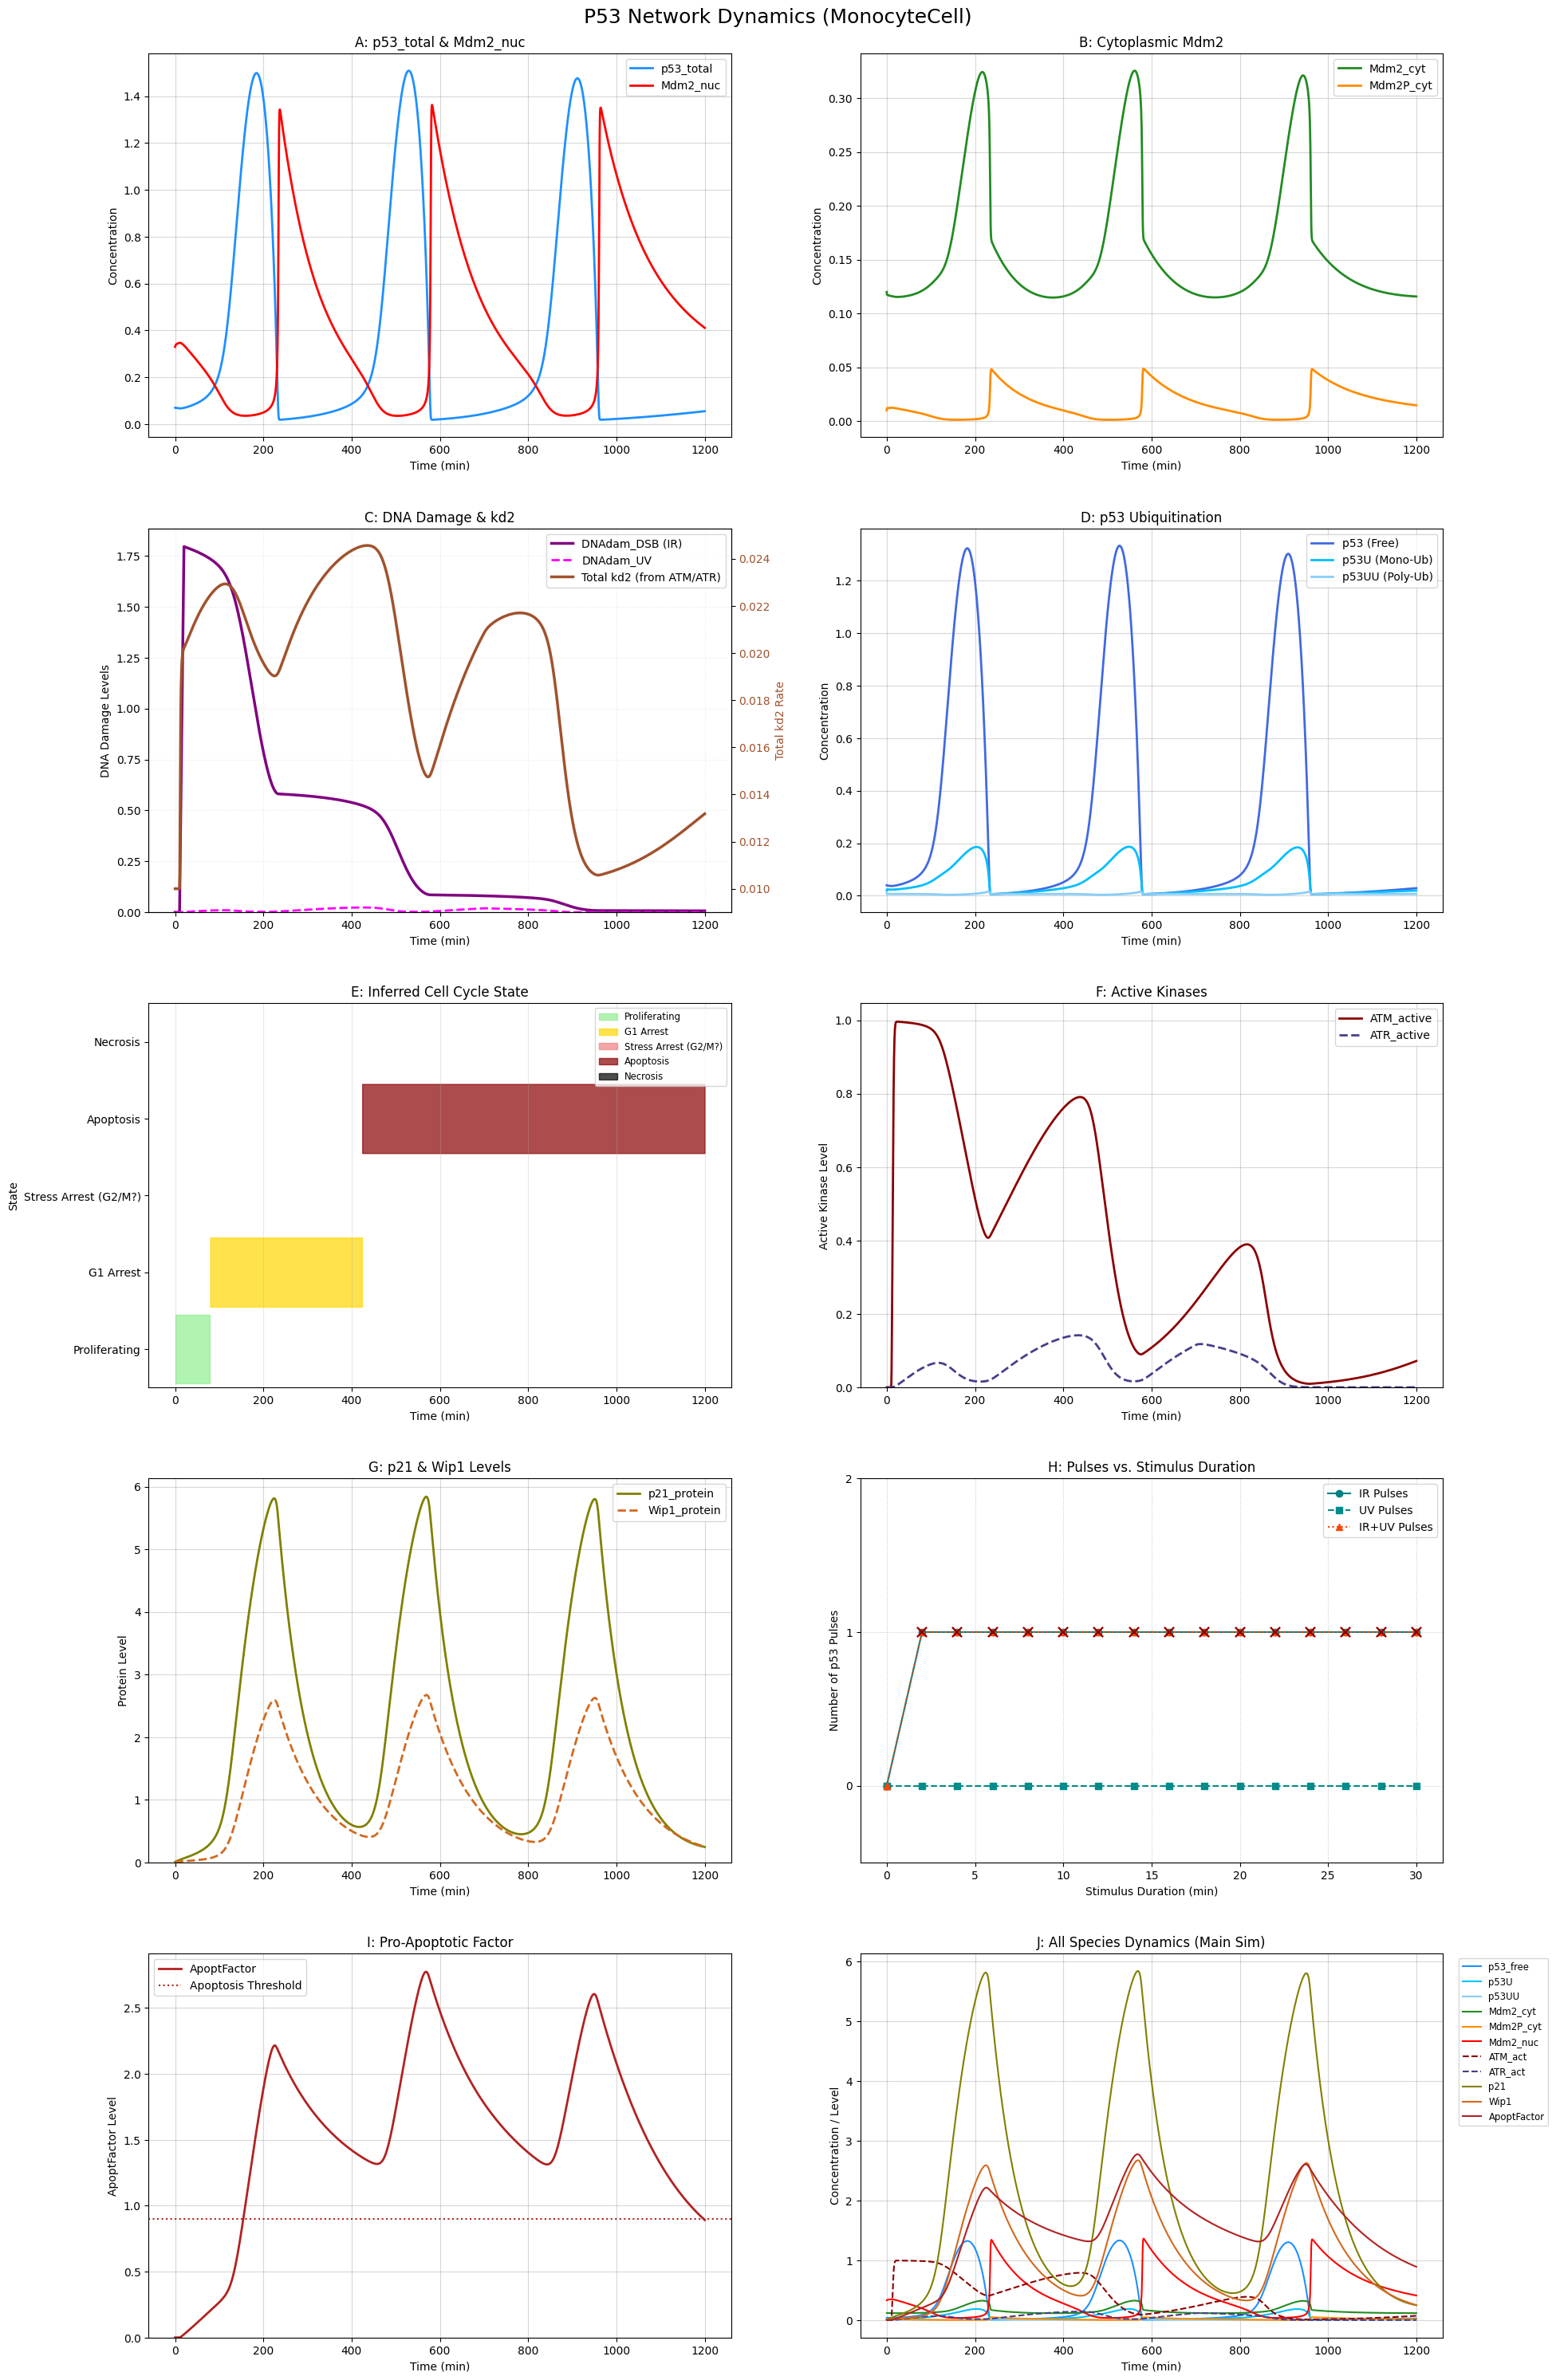

Environment Information:
UV Start: 10, UV End: 700, UV Amplitude: 0.001
IR Start: 10, IR End: 20, IR Amplitude: 1.0
Cell information (Main Simulation):
Apoptosis triggered at time: 424.00 minutes
Reason for apoptosis: Factor_duration_met


<Figure size 640x480 with 0 Axes>

Figure saved as 'p53_full_simulation_MonocyteCell.png'.
Running simulation with SenescentCell
Models a senescent cell as an AdvancedCell. Exhibits permanent cell cycle arrest 
via high/stable p21, and high resistance to apoptosis.


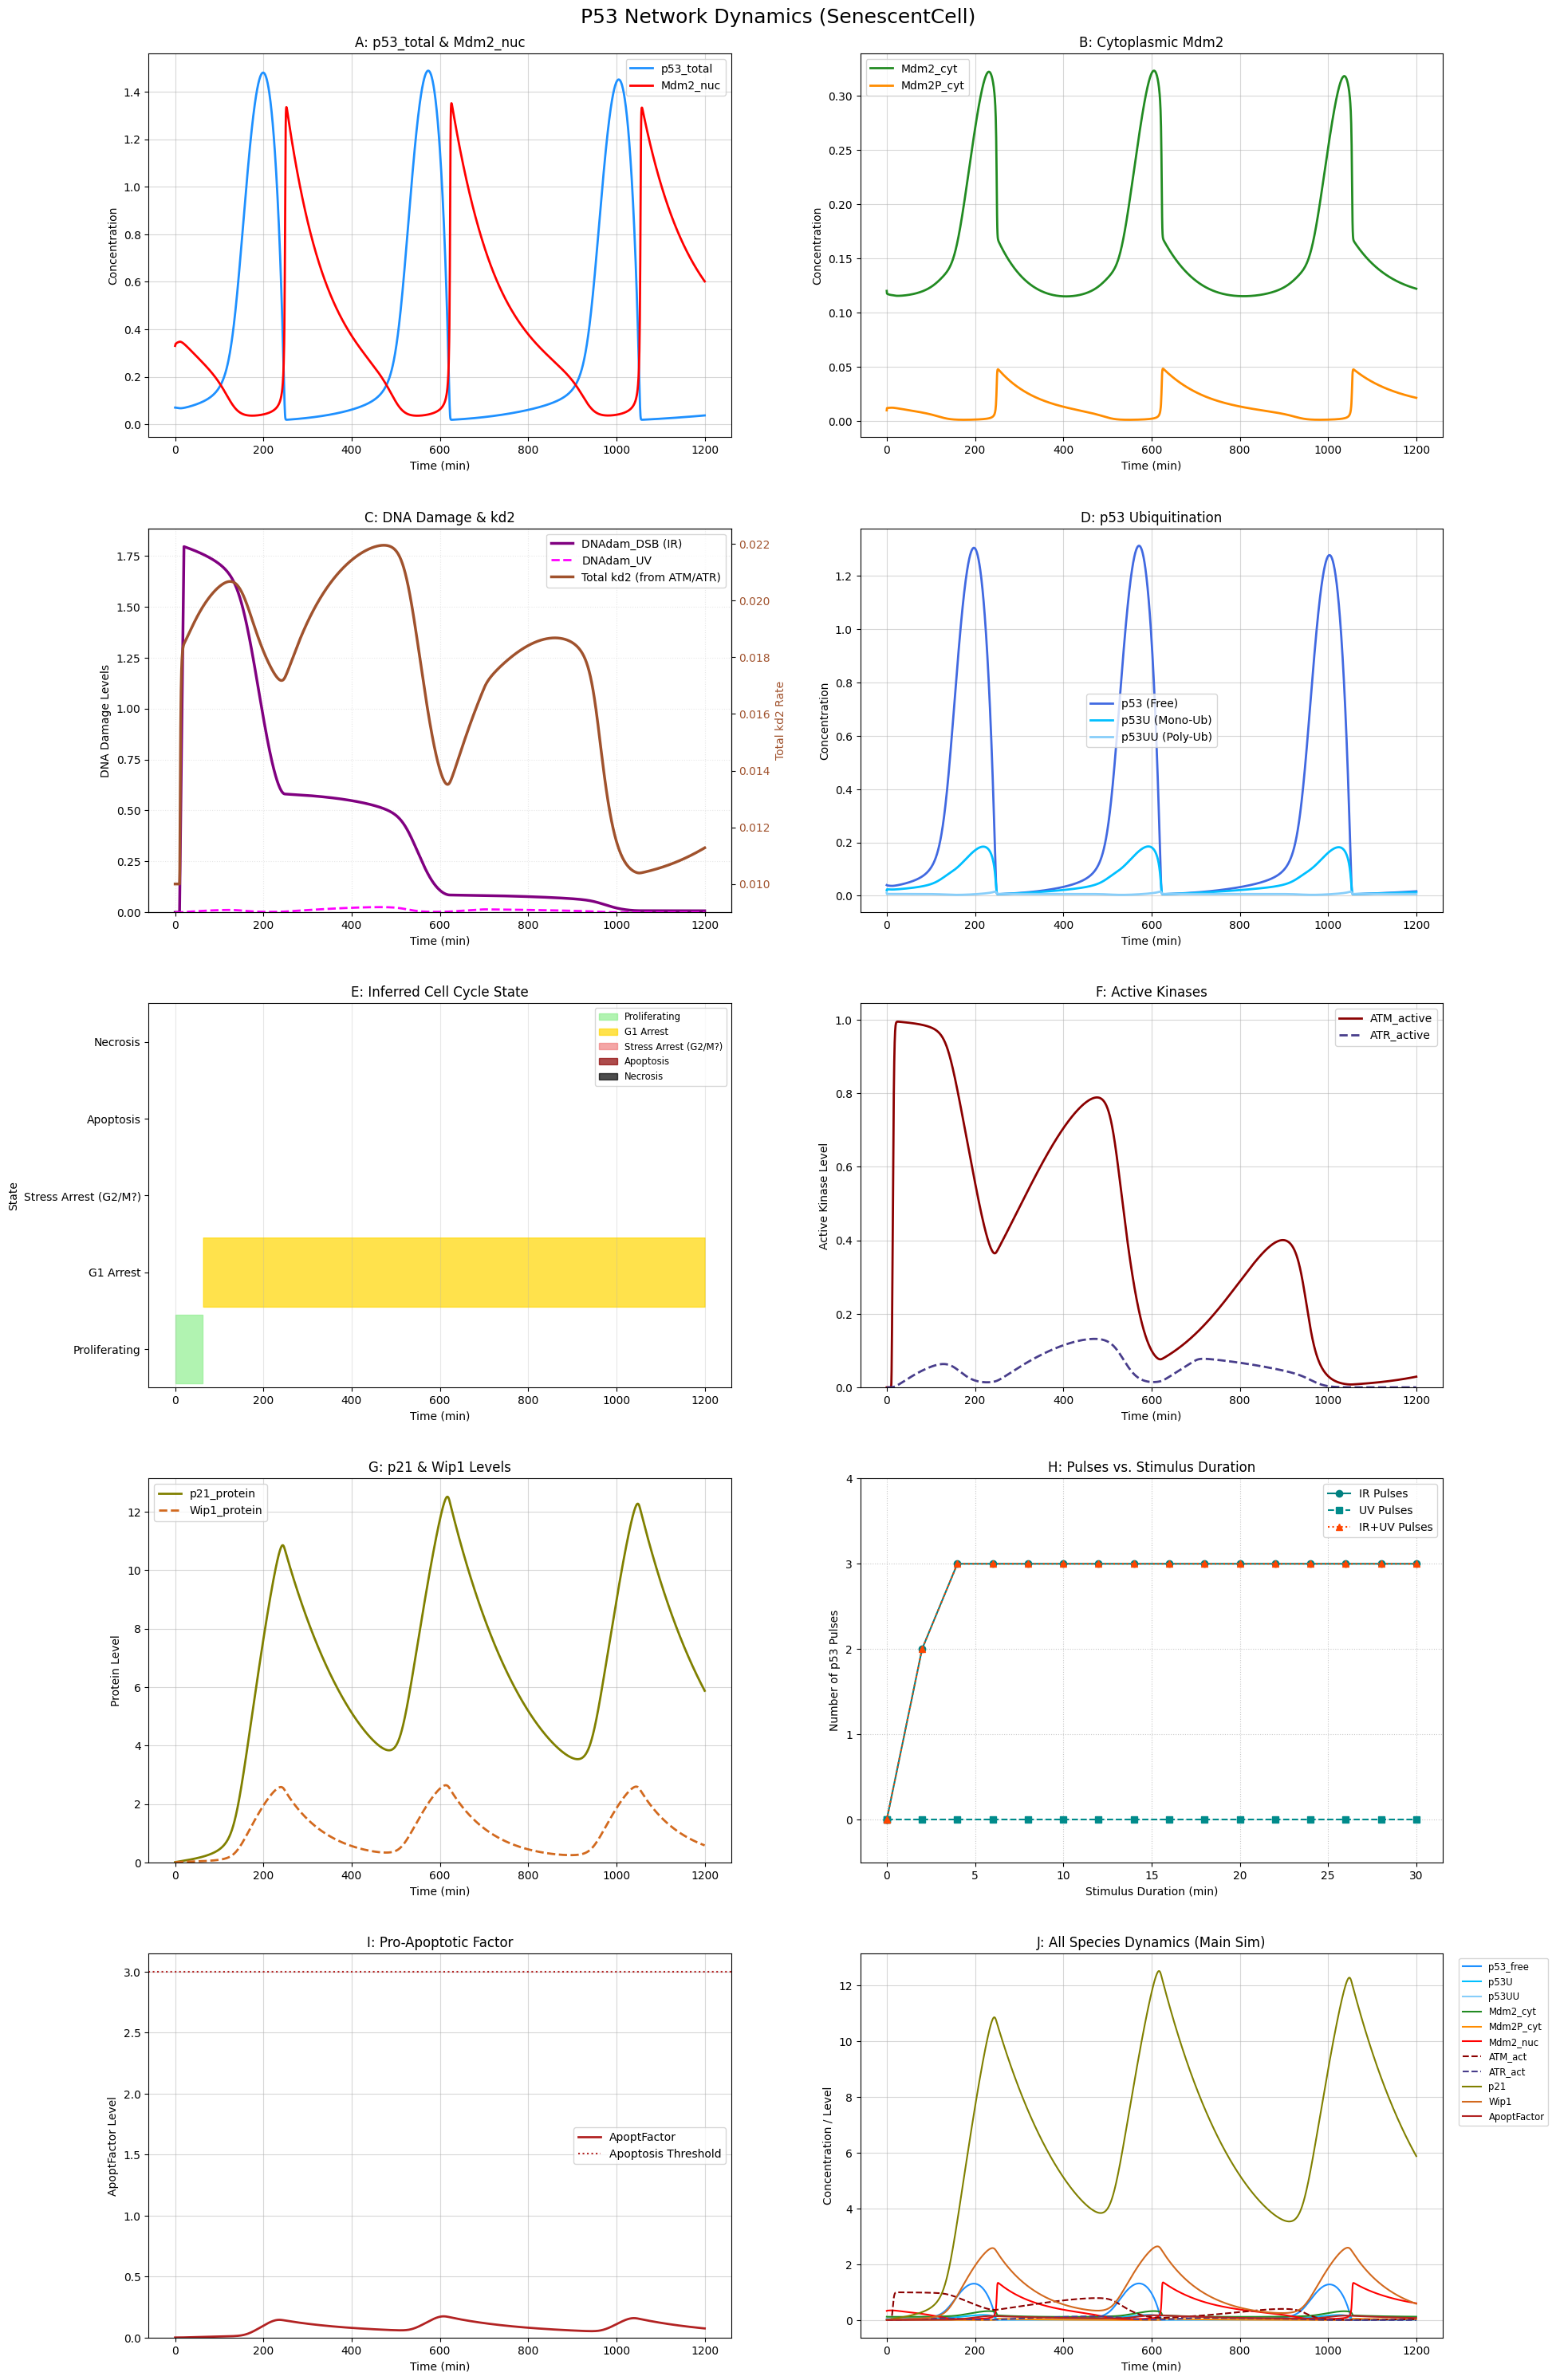

Environment Information:
UV Start: 10, UV End: 700, UV Amplitude: 0.001
IR Start: 10, IR End: 20, IR Amplitude: 1.0
Cell information (Main Simulation):
No apoptosis triggered in main simulation.


<Figure size 640x480 with 0 Axes>

Figure saved as 'p53_full_simulation_SenescentCell.png'.
Running simulation with UVResistantCell
An AdvancedCell variant with enhanced UV resistance. Features include faster UV damage repair, 
more robust ATR activation, stronger ATR-mediated Mdm2 degradation, potentially 
more sensitive p21 induction, and a higher threshold for apoptosis, 
prioritizing repair over cell death in response to UV.


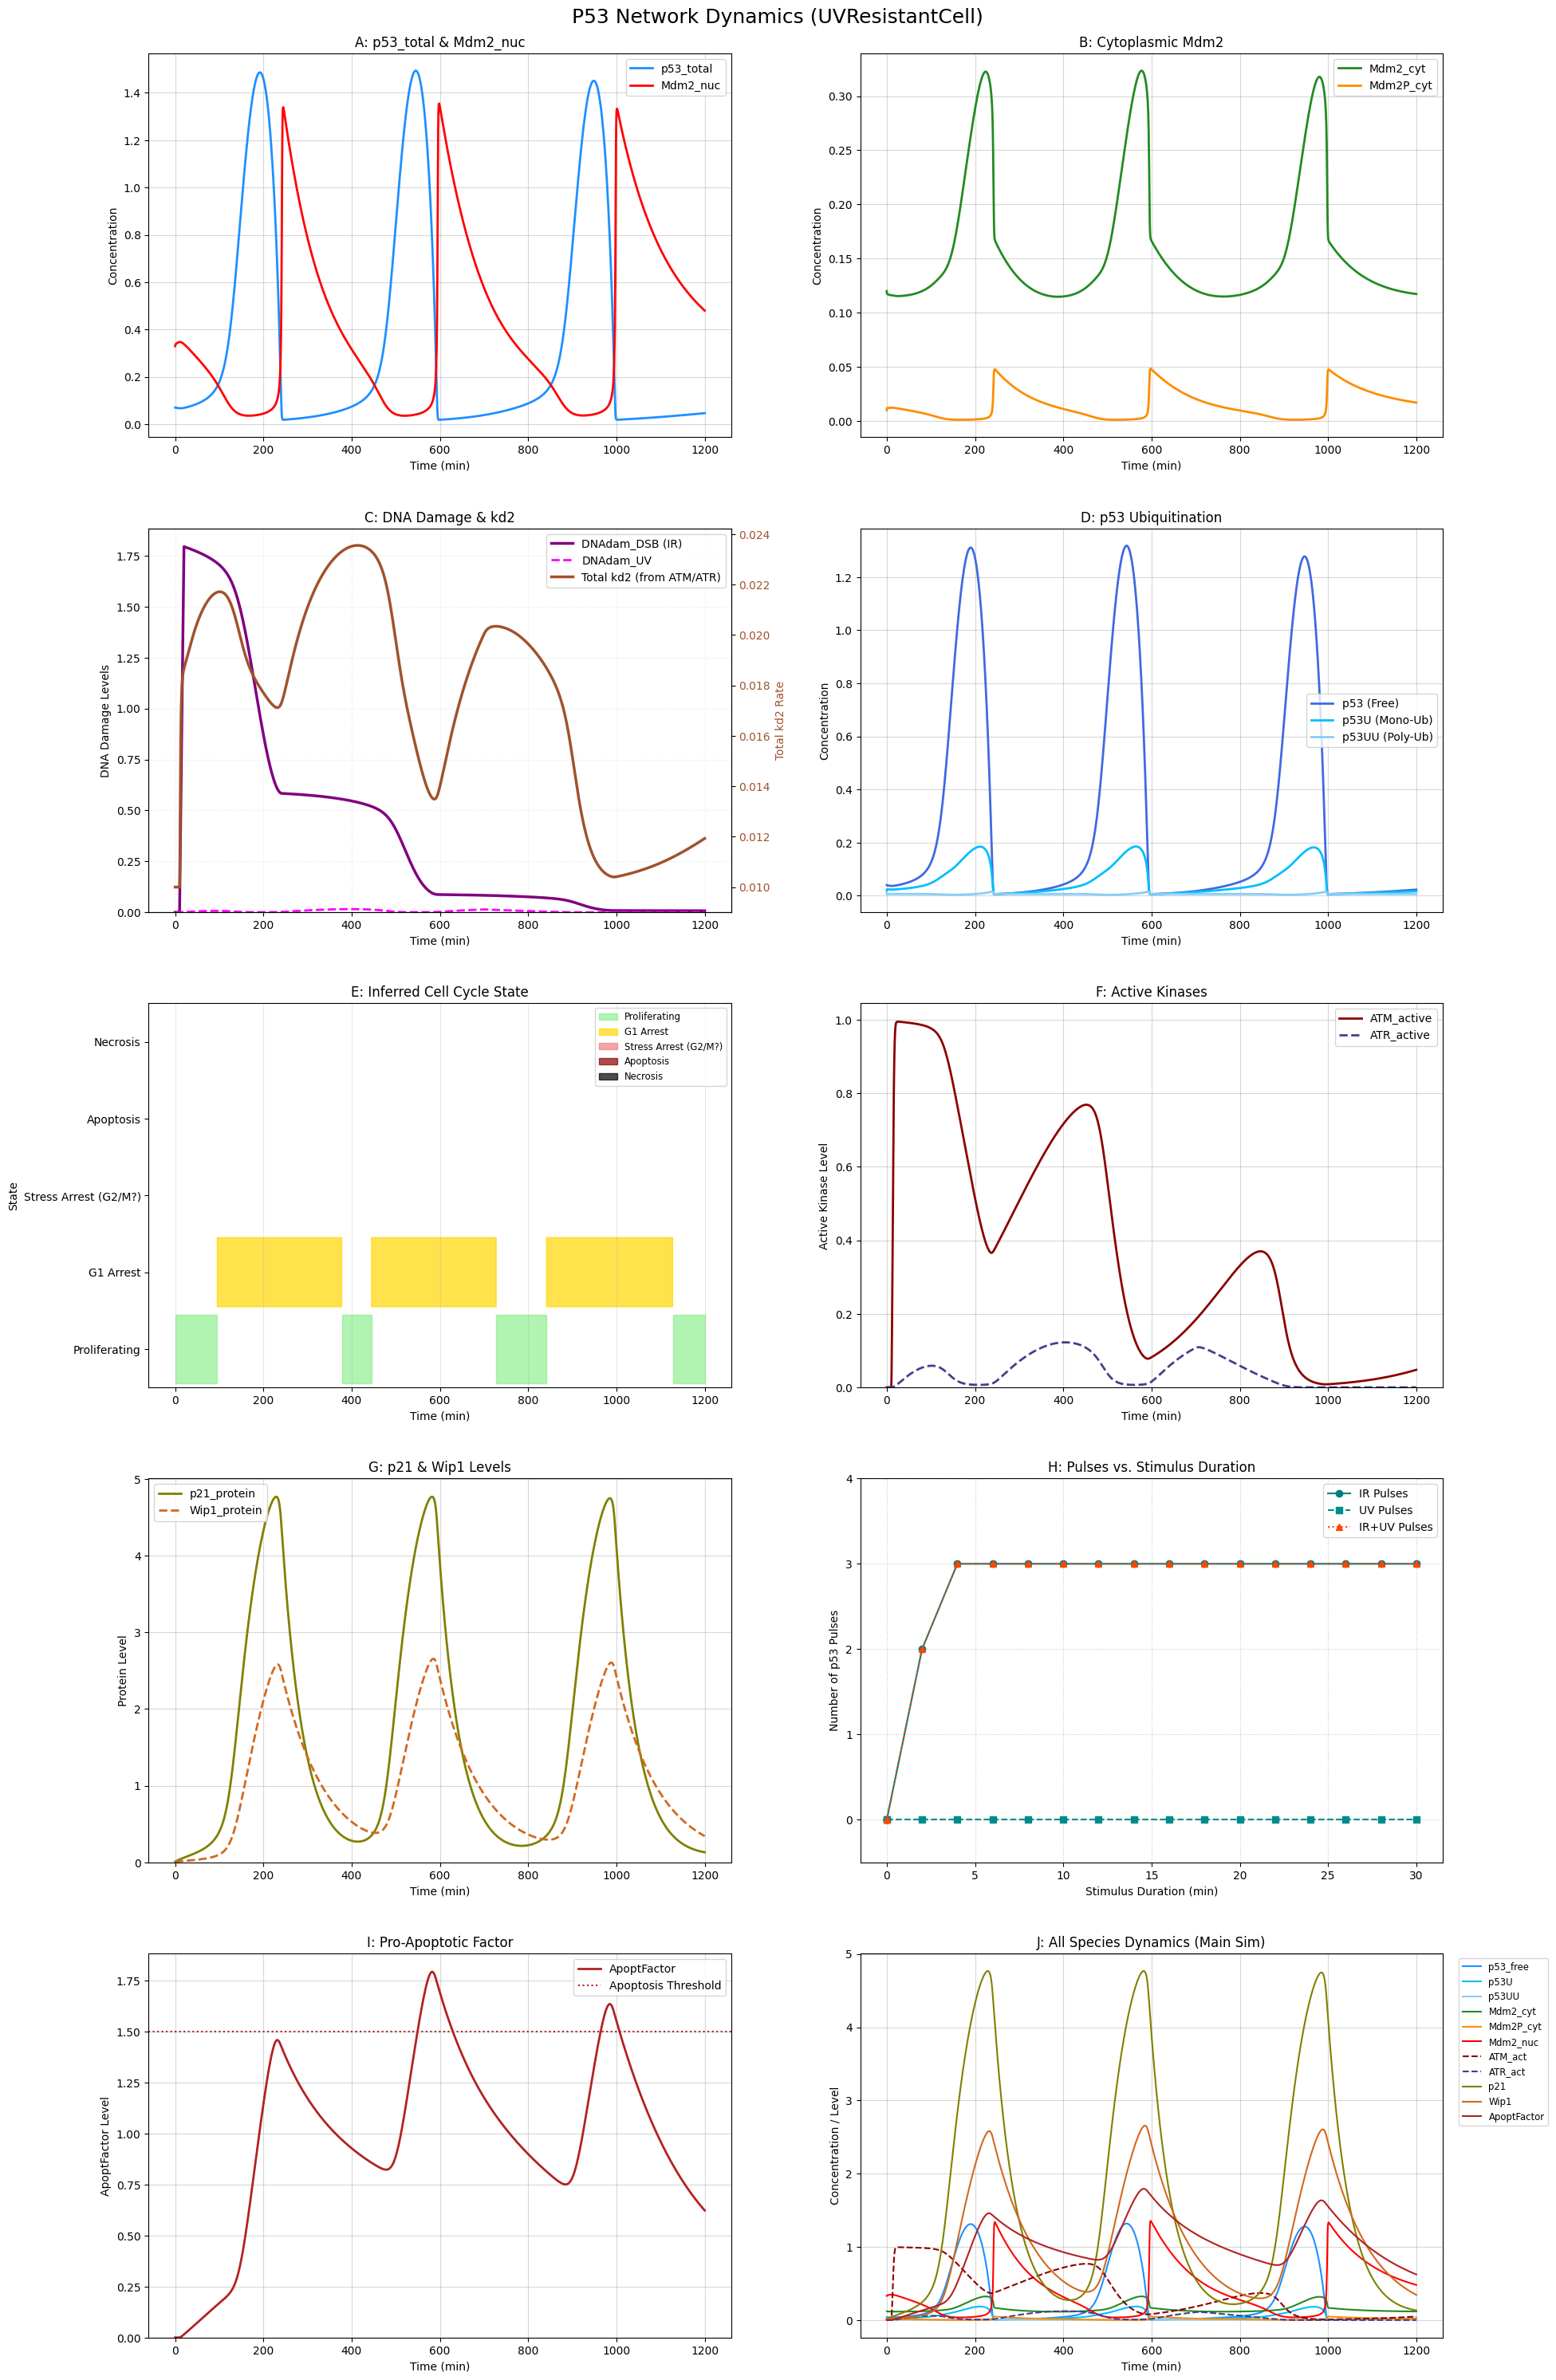

Environment Information:
UV Start: 10, UV End: 700, UV Amplitude: 0.001
IR Start: 10, IR End: 20, IR Amplitude: 1.0
Cell information (Main Simulation):
No apoptosis triggered in main simulation.


<Figure size 640x480 with 0 Axes>

Figure saved as 'p53_full_simulation_UVResistantCell.png'.
Running simulation with CancerCellp53Mutant
Simulates a cancer cell with a mutant/deficient p53, modeled as an AdvancedCell 
where p53's ability to transactivate downstream targets is severely impaired. 
Leads to loss of p53-mediated cell cycle arrest and apoptosis.


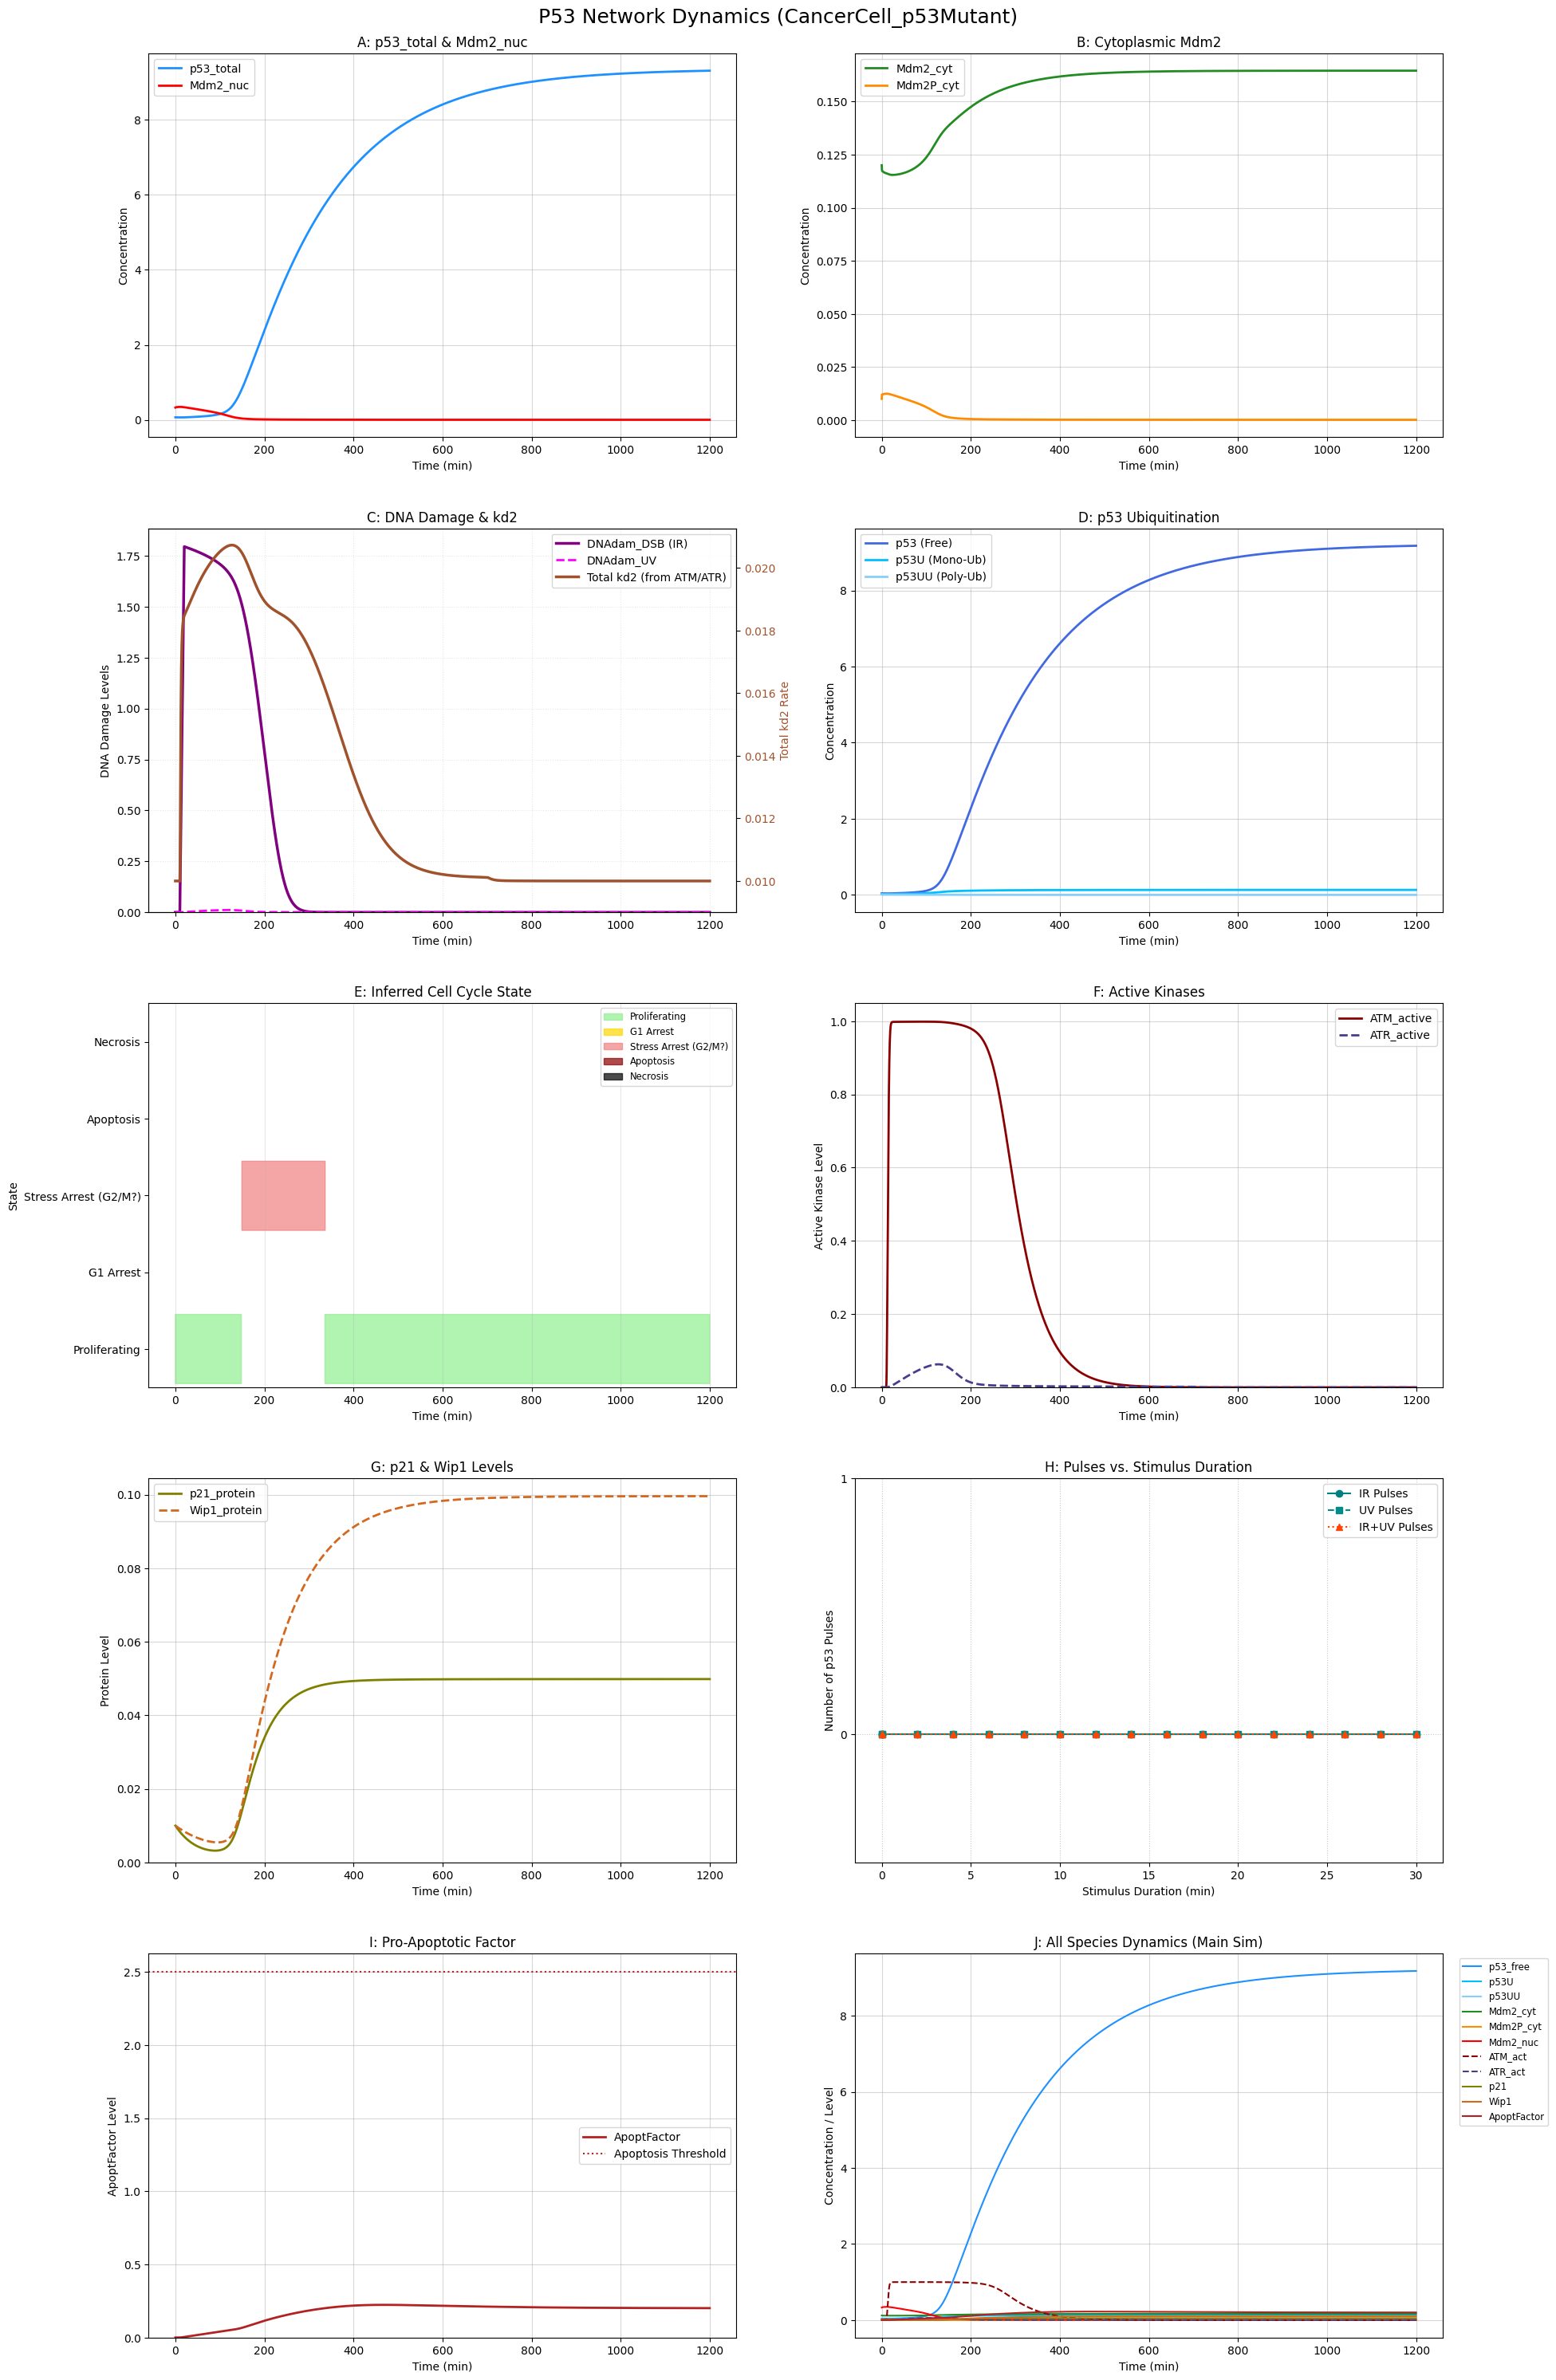

Environment Information:
UV Start: 10, UV End: 700, UV Amplitude: 0.001
IR Start: 10, IR End: 20, IR Amplitude: 1.0
Cell information (Main Simulation):
No apoptosis triggered in main simulation.


<Figure size 640x480 with 0 Axes>

Figure saved as 'p53_full_simulation_CancerCell_p53Mutant.png'.
Running simulation with StemCellEmbryonic
Represents an embryonic-like stem cell, modeled as an AdvancedCell. Characterized by high sensitivity to DNA 
damage, prioritizing apoptosis. Features rapid p53 induction, potent apoptotic response, 
and less emphasis on prolonged cell cycle arrest.


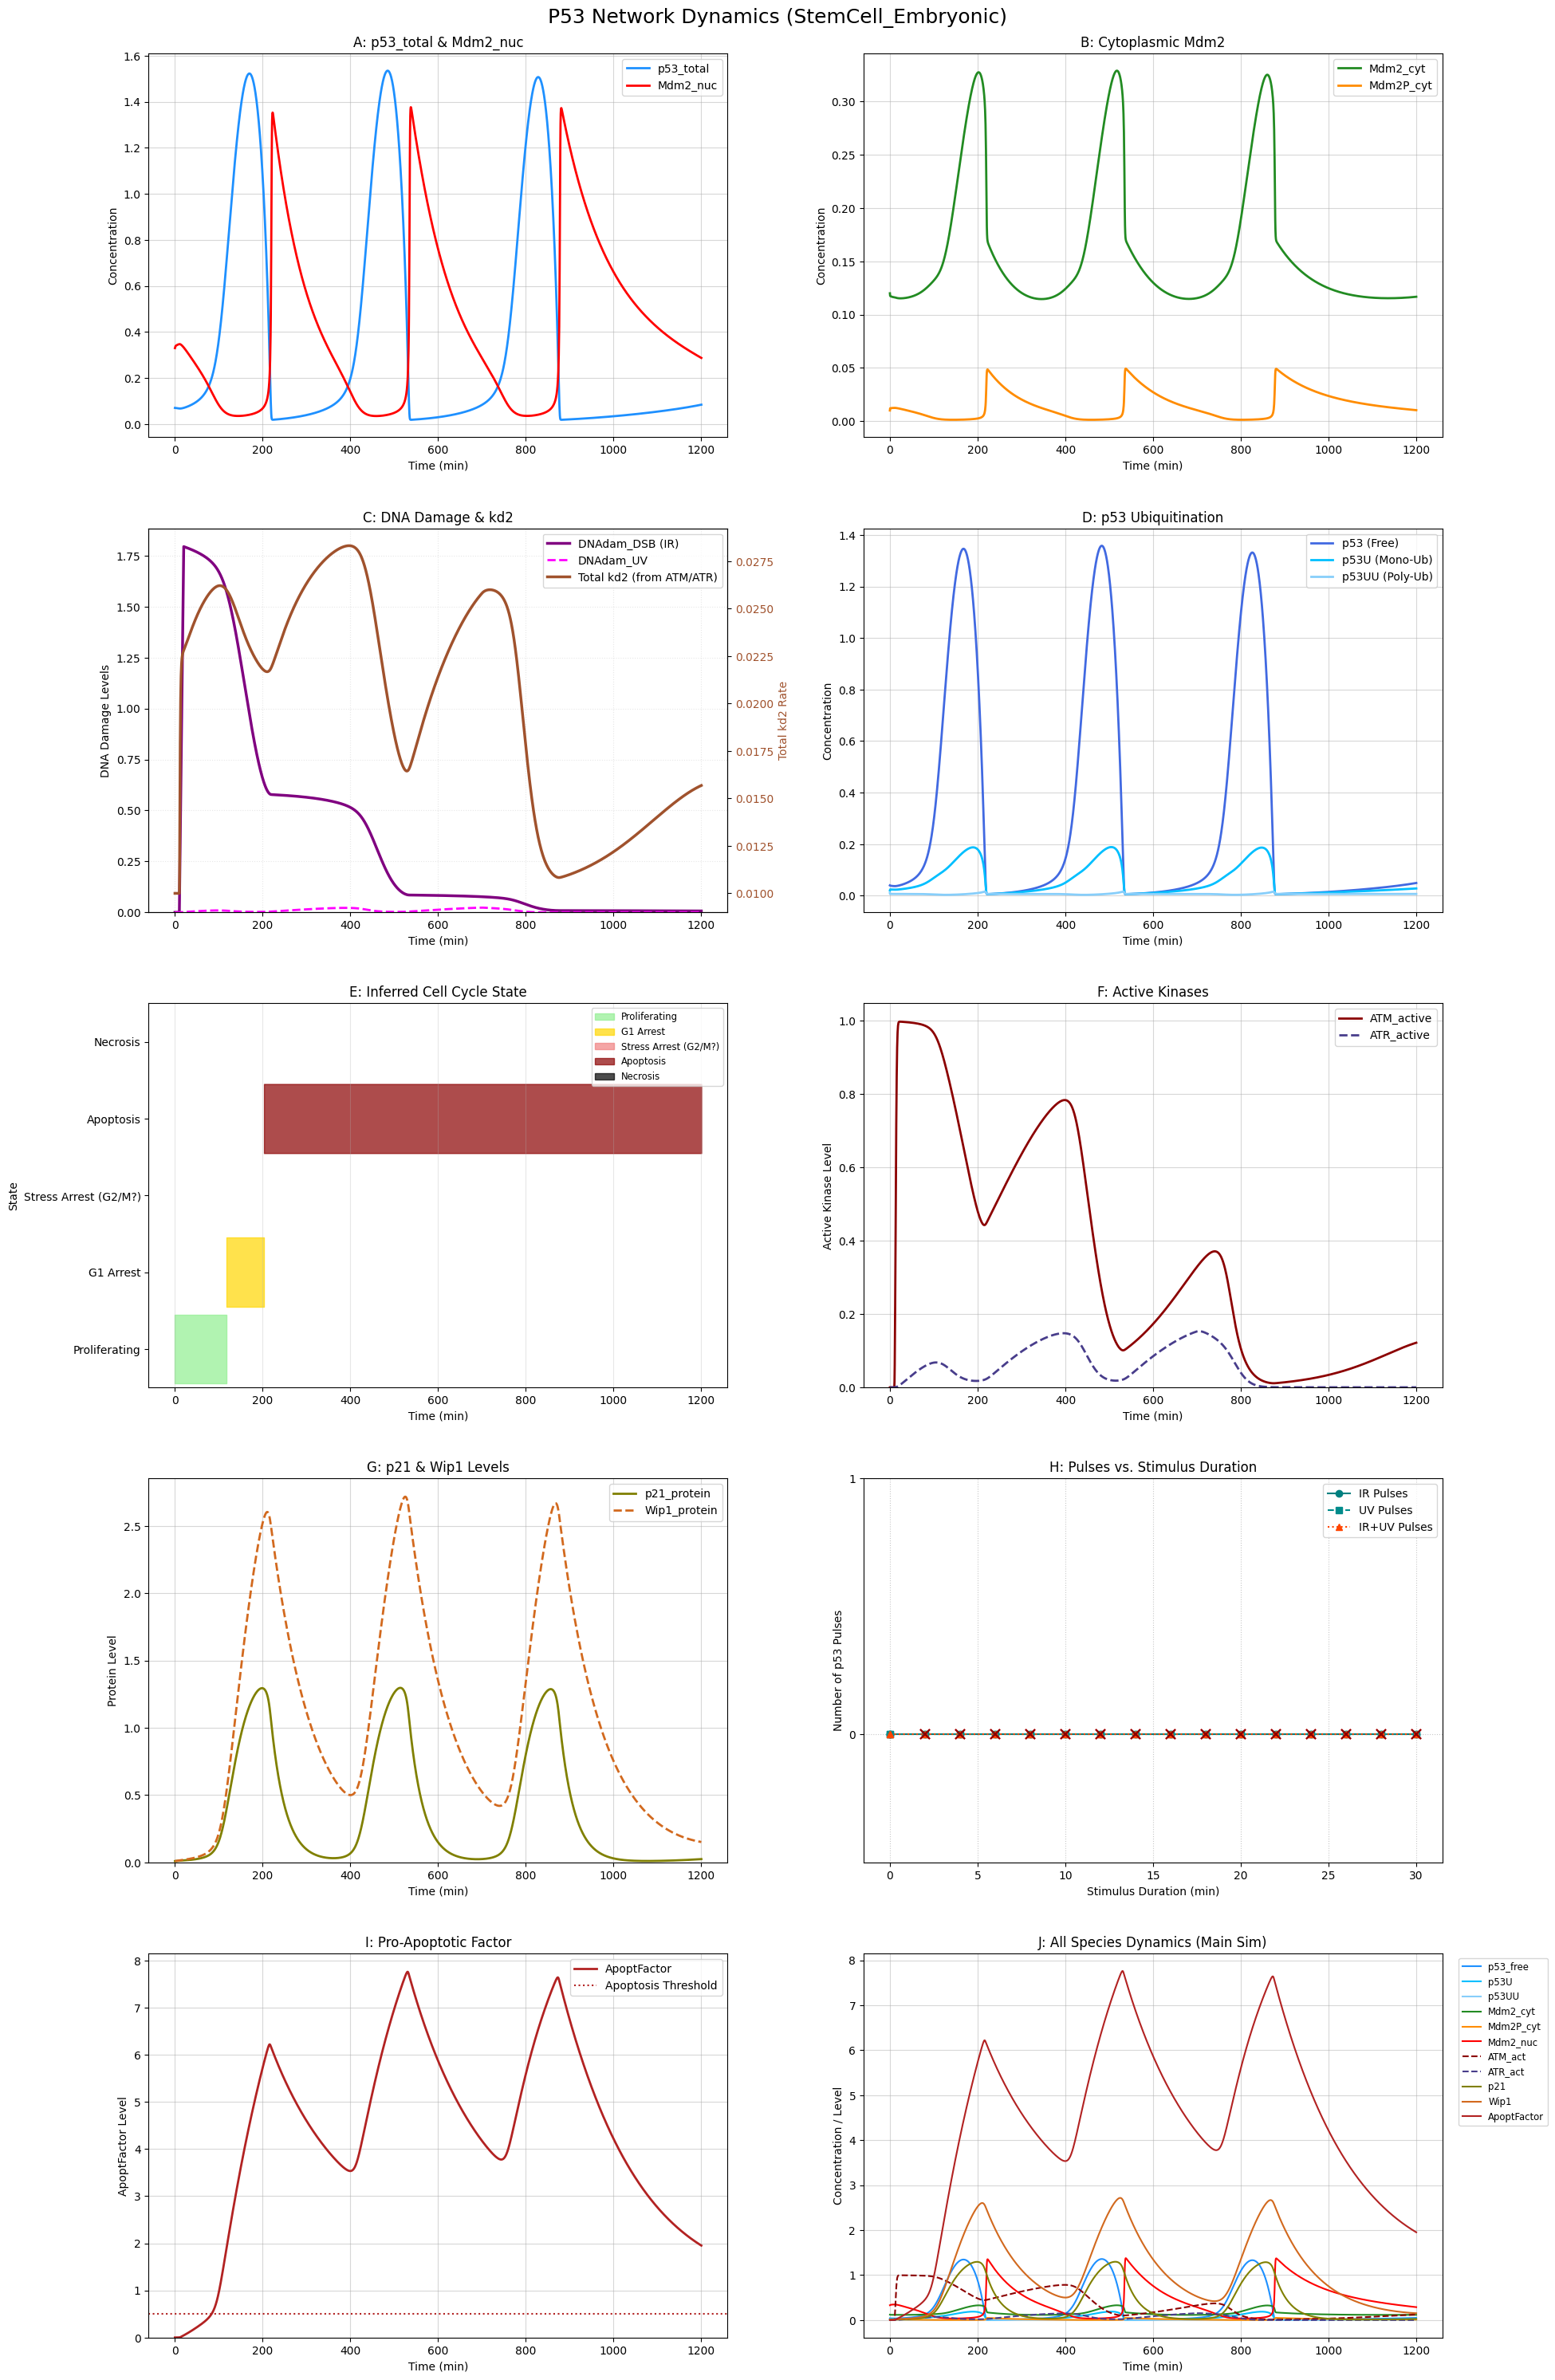

Environment Information:
UV Start: 10, UV End: 700, UV Amplitude: 0.001
IR Start: 10, IR End: 20, IR Amplitude: 1.0
Cell information (Main Simulation):
Apoptosis triggered at time: 203.00 minutes
Reason for apoptosis: Factor_duration_met


<Figure size 640x480 with 0 Axes>

Figure saved as 'p53_full_simulation_StemCell_Embryonic.png'.
Running simulation with CancerCellRestoredp53
A p53-mutant cancer cell (AdvancedCell based) where p53 transactivation function is partially restored. 
Investigates how re-activating p53 impacts cell fate in a cancerous background.


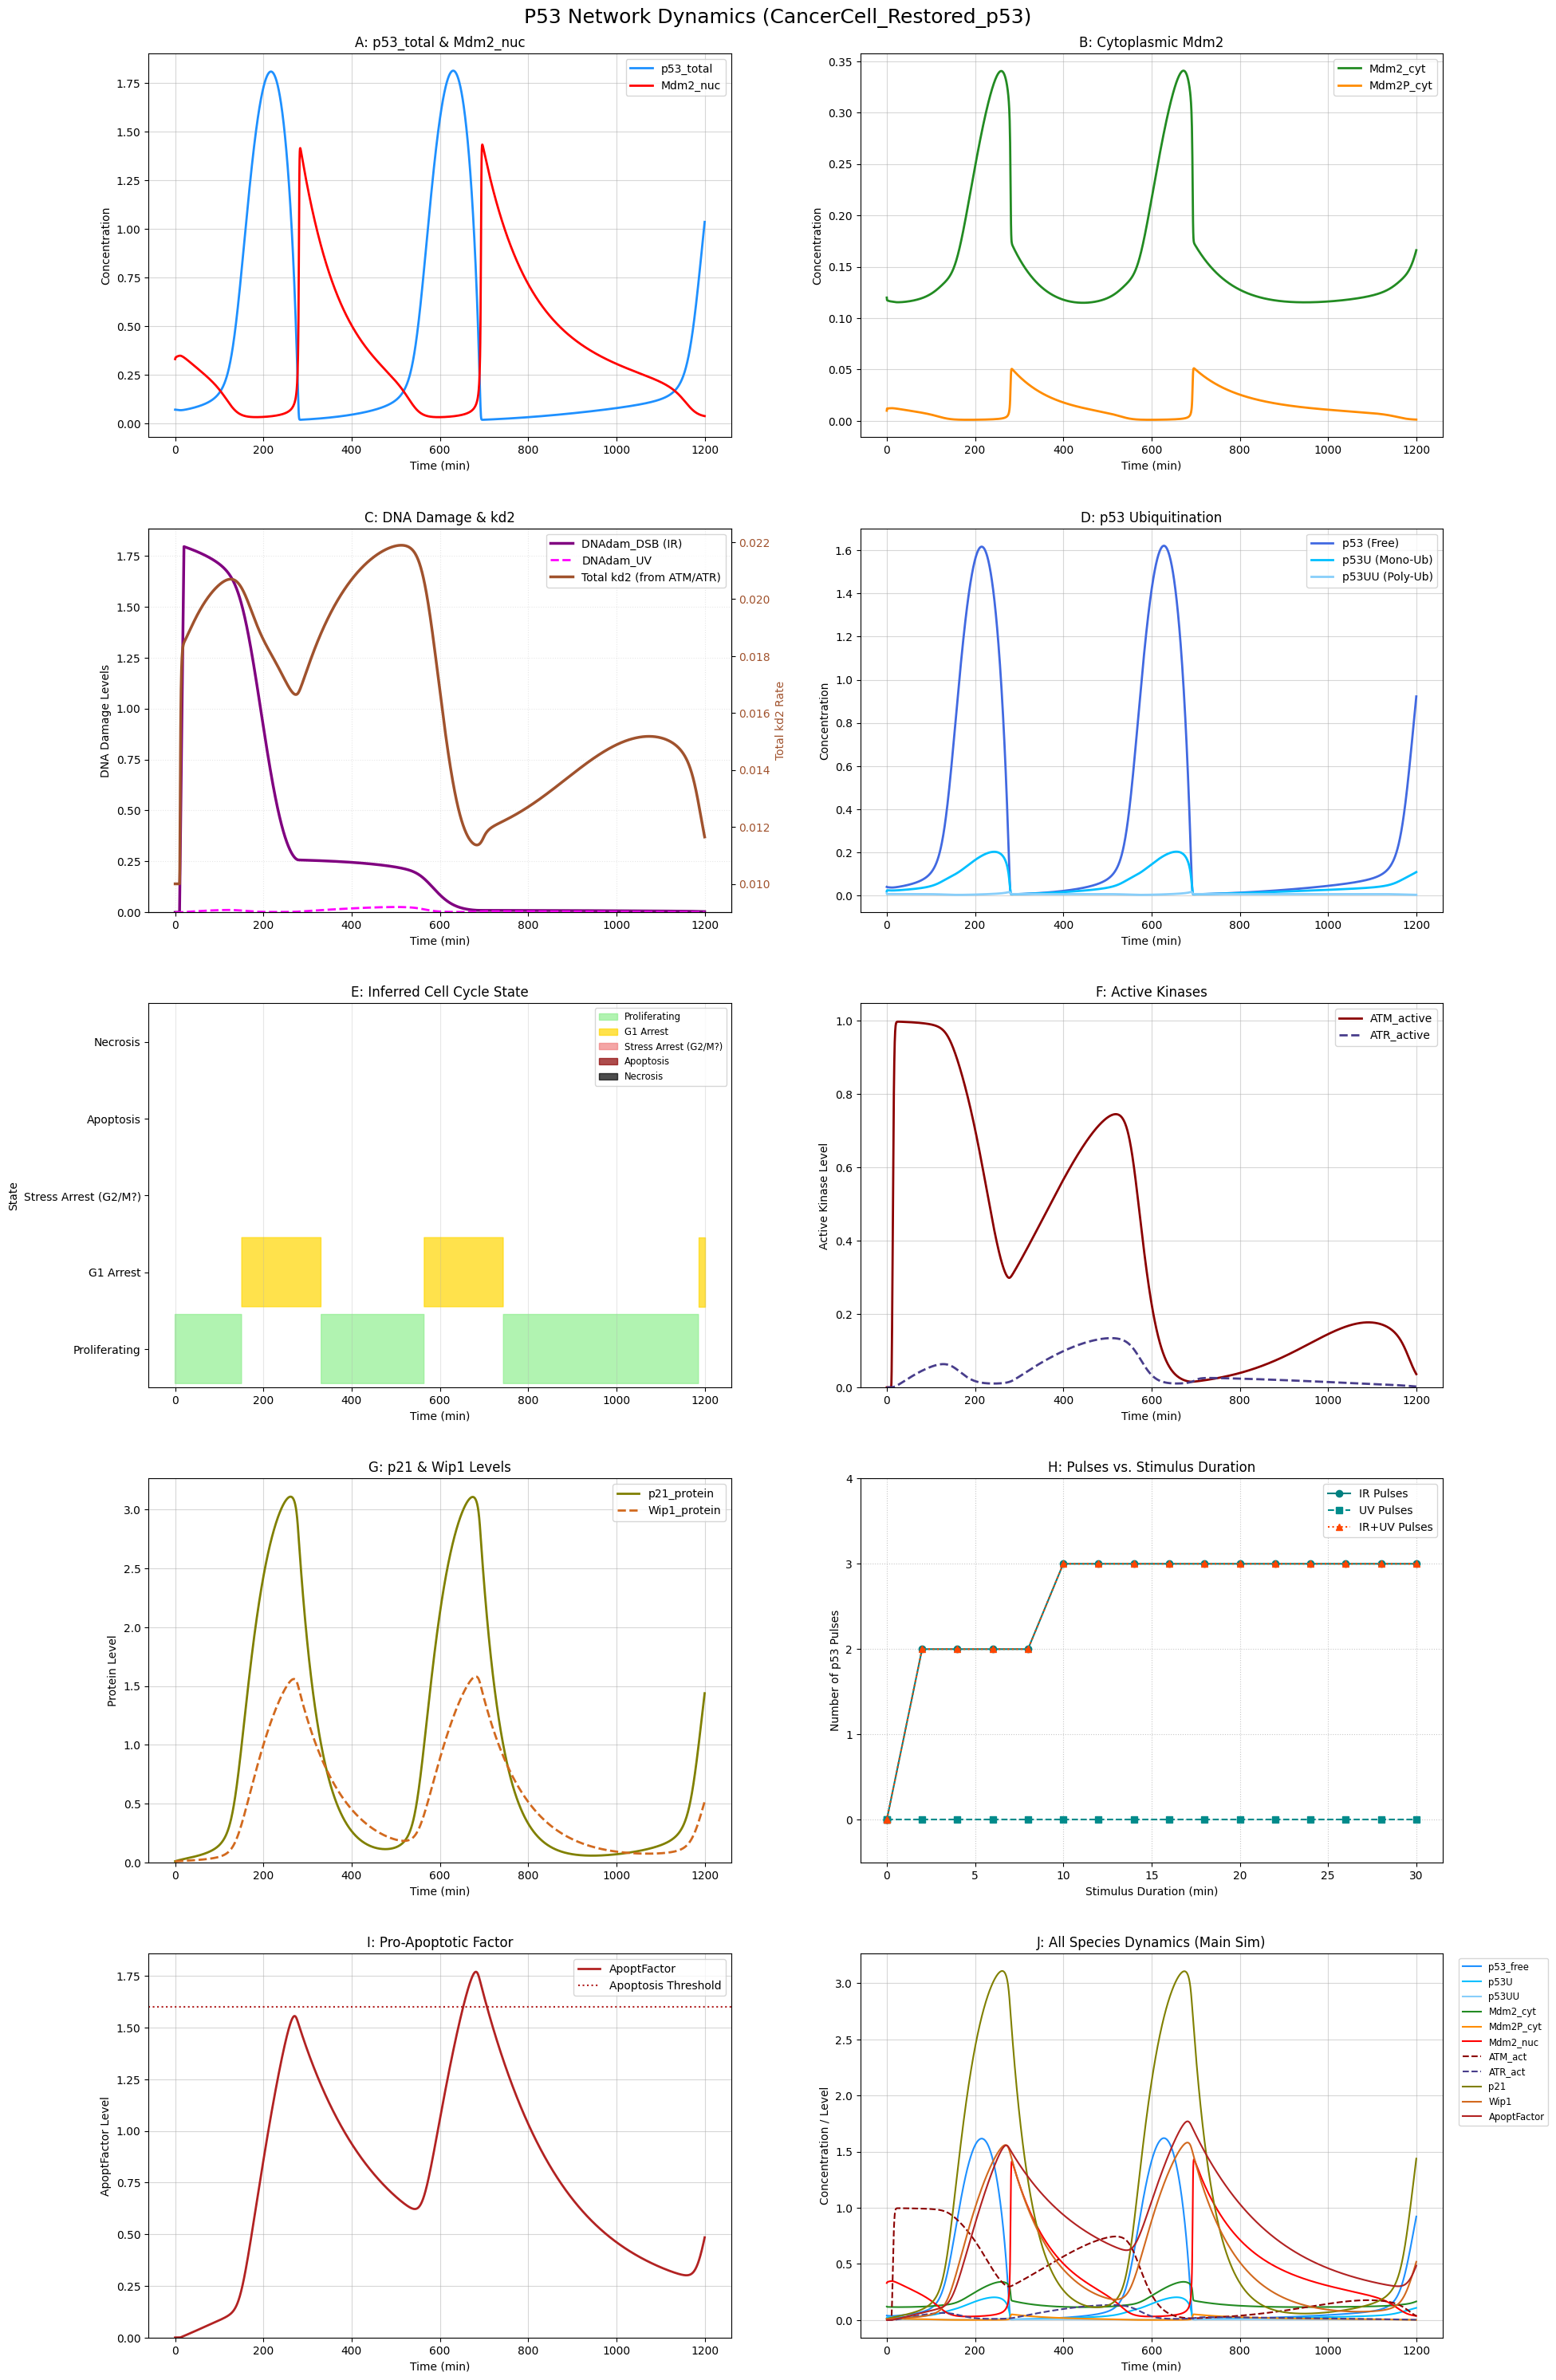

Environment Information:
UV Start: 10, UV End: 700, UV Amplitude: 0.001
IR Start: 10, IR End: 20, IR Amplitude: 1.0
Cell information (Main Simulation):
No apoptosis triggered in main simulation.


<Figure size 640x480 with 0 Axes>

Figure saved as 'p53_full_simulation_CancerCell_Restored_p53.png'.
Running simulation with RadioresistantCancerCell
An AdvancedCell model of a cancer cell with wild-type p53 that exhibits radioresistance. 
Achieved through enhanced DSB repair and increased apoptosis thresholds.


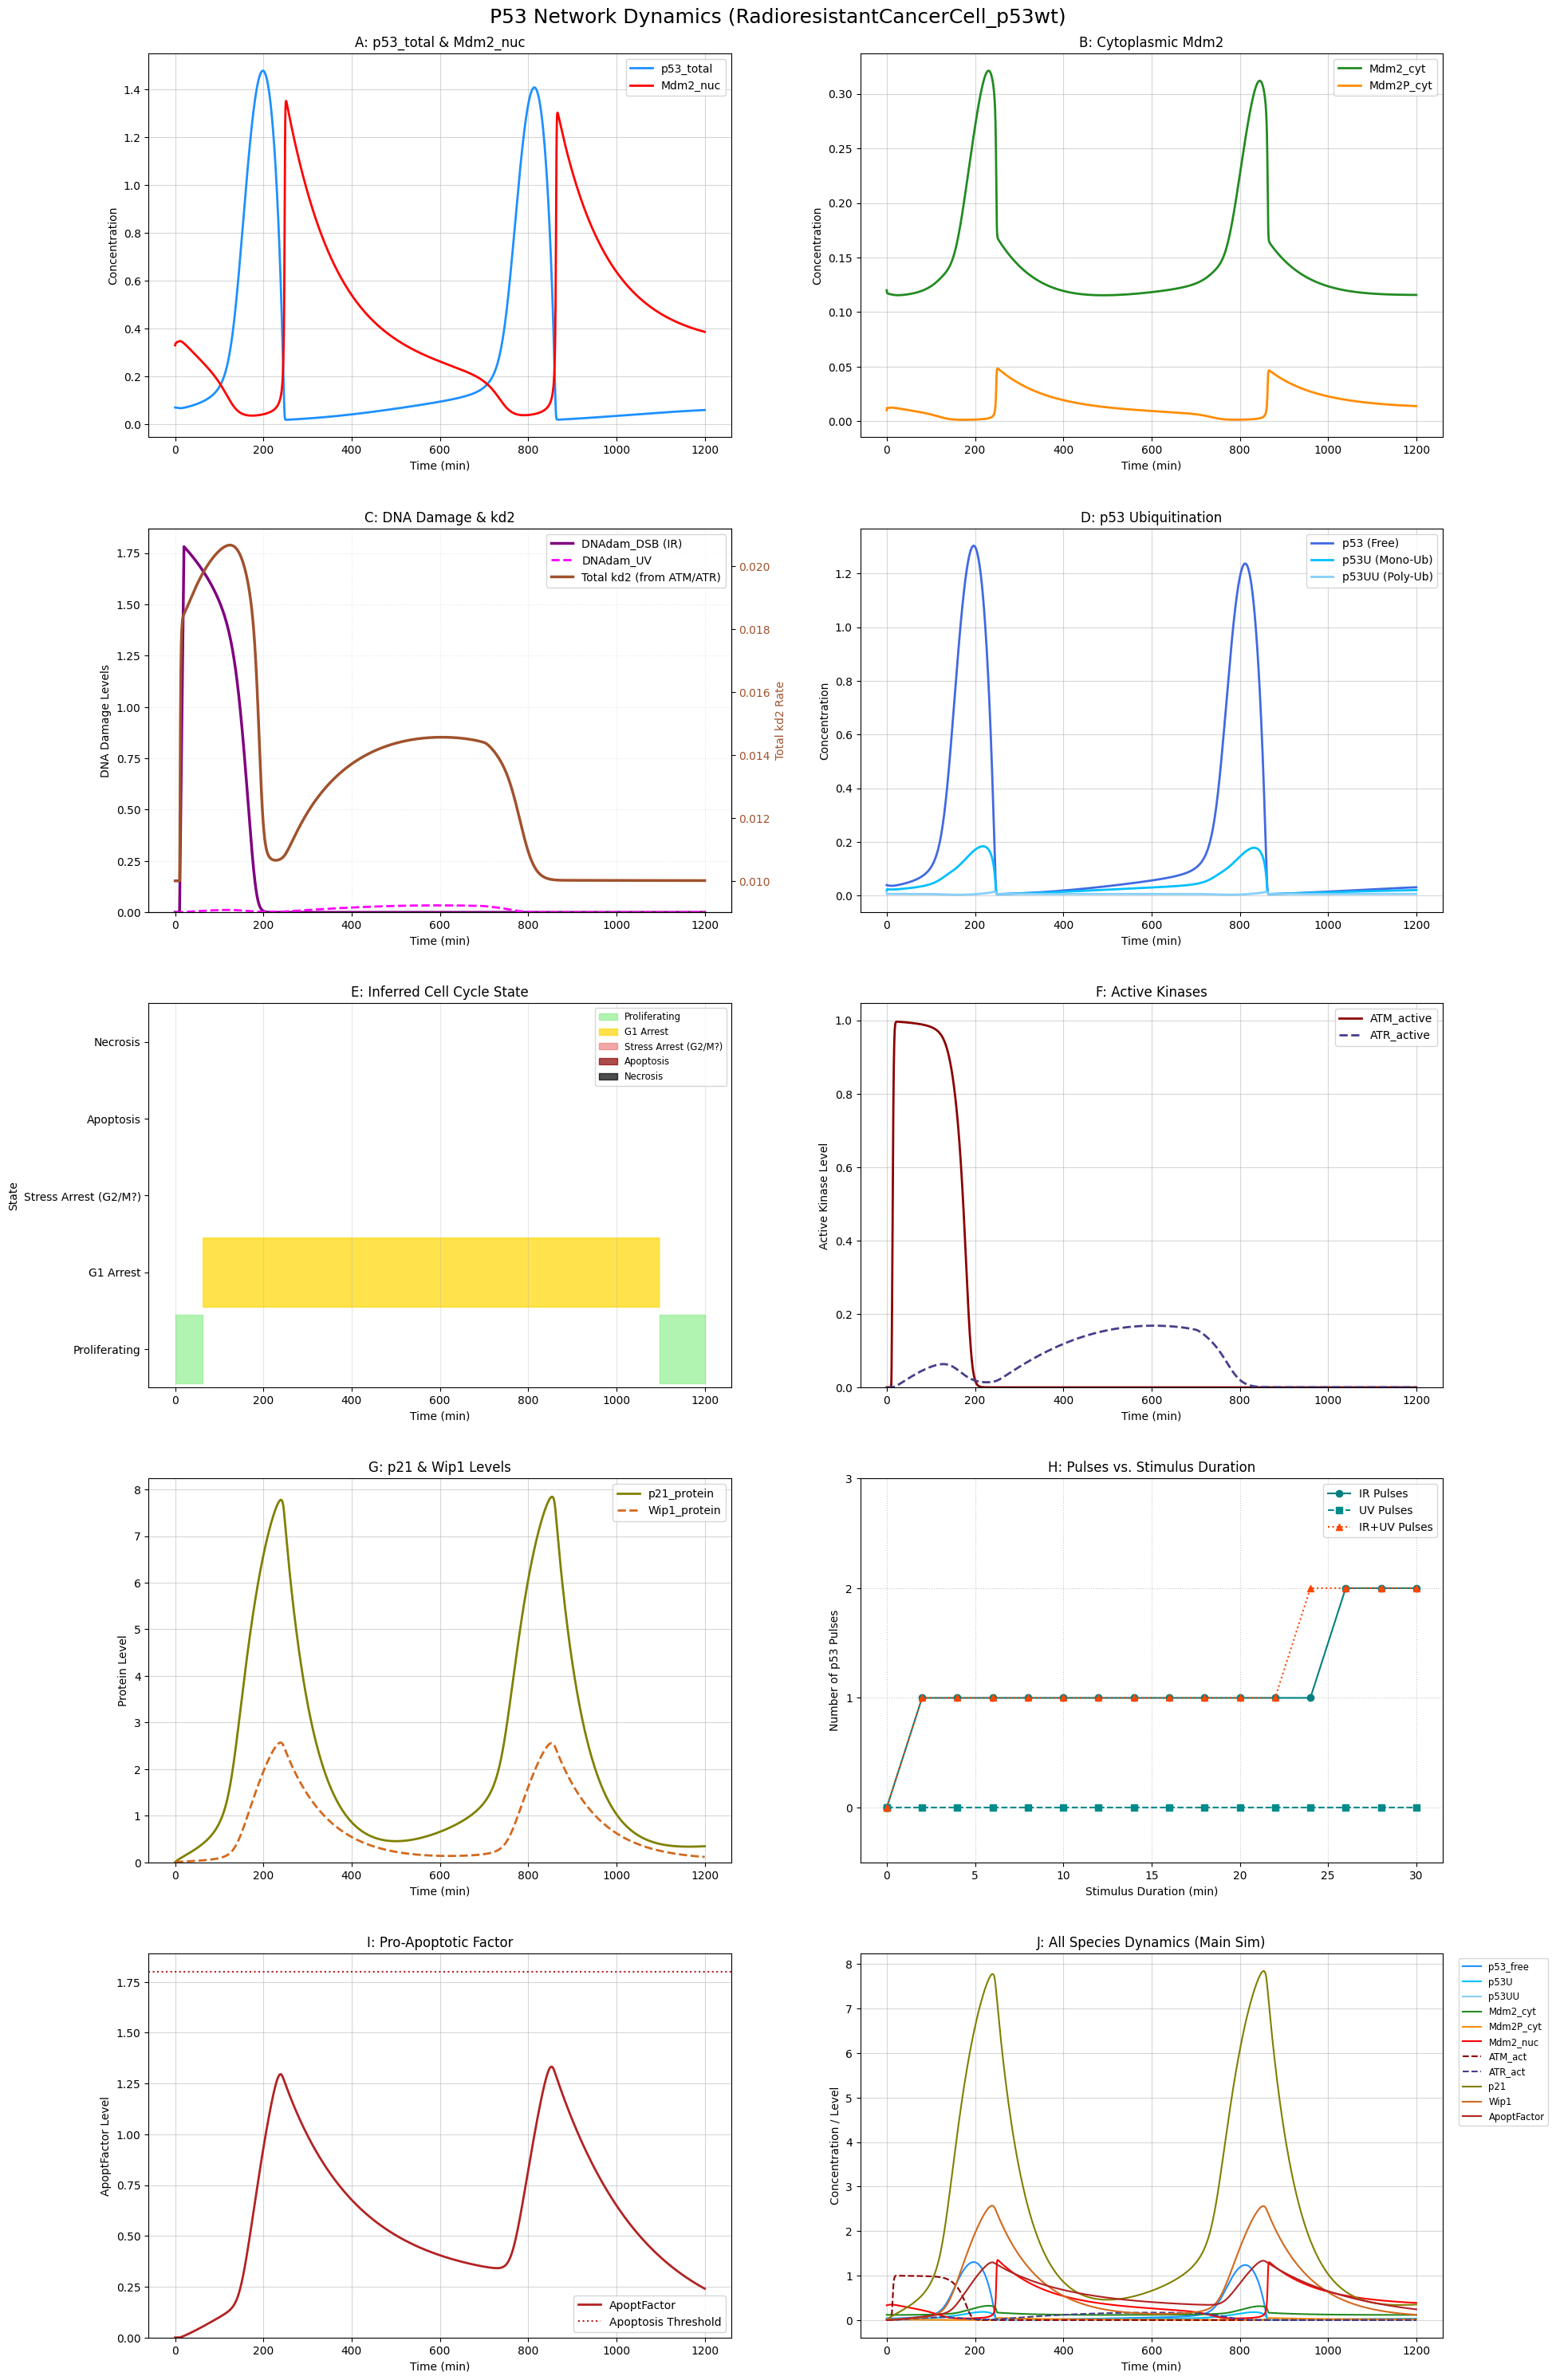

Environment Information:
UV Start: 10, UV End: 700, UV Amplitude: 0.001
IR Start: 10, IR End: 20, IR Amplitude: 1.0
Cell information (Main Simulation):
No apoptosis triggered in main simulation.


<Figure size 640x480 with 0 Axes>

Figure saved as 'p53_full_simulation_RadioresistantCancerCell_p53wt.png'.
Running simulation with FibroblastCell
An AdvancedCell model of a differentiated fibroblast, typically quiescent (G0). 
Possesses a functional p53 pathway for robust DNA damage response.


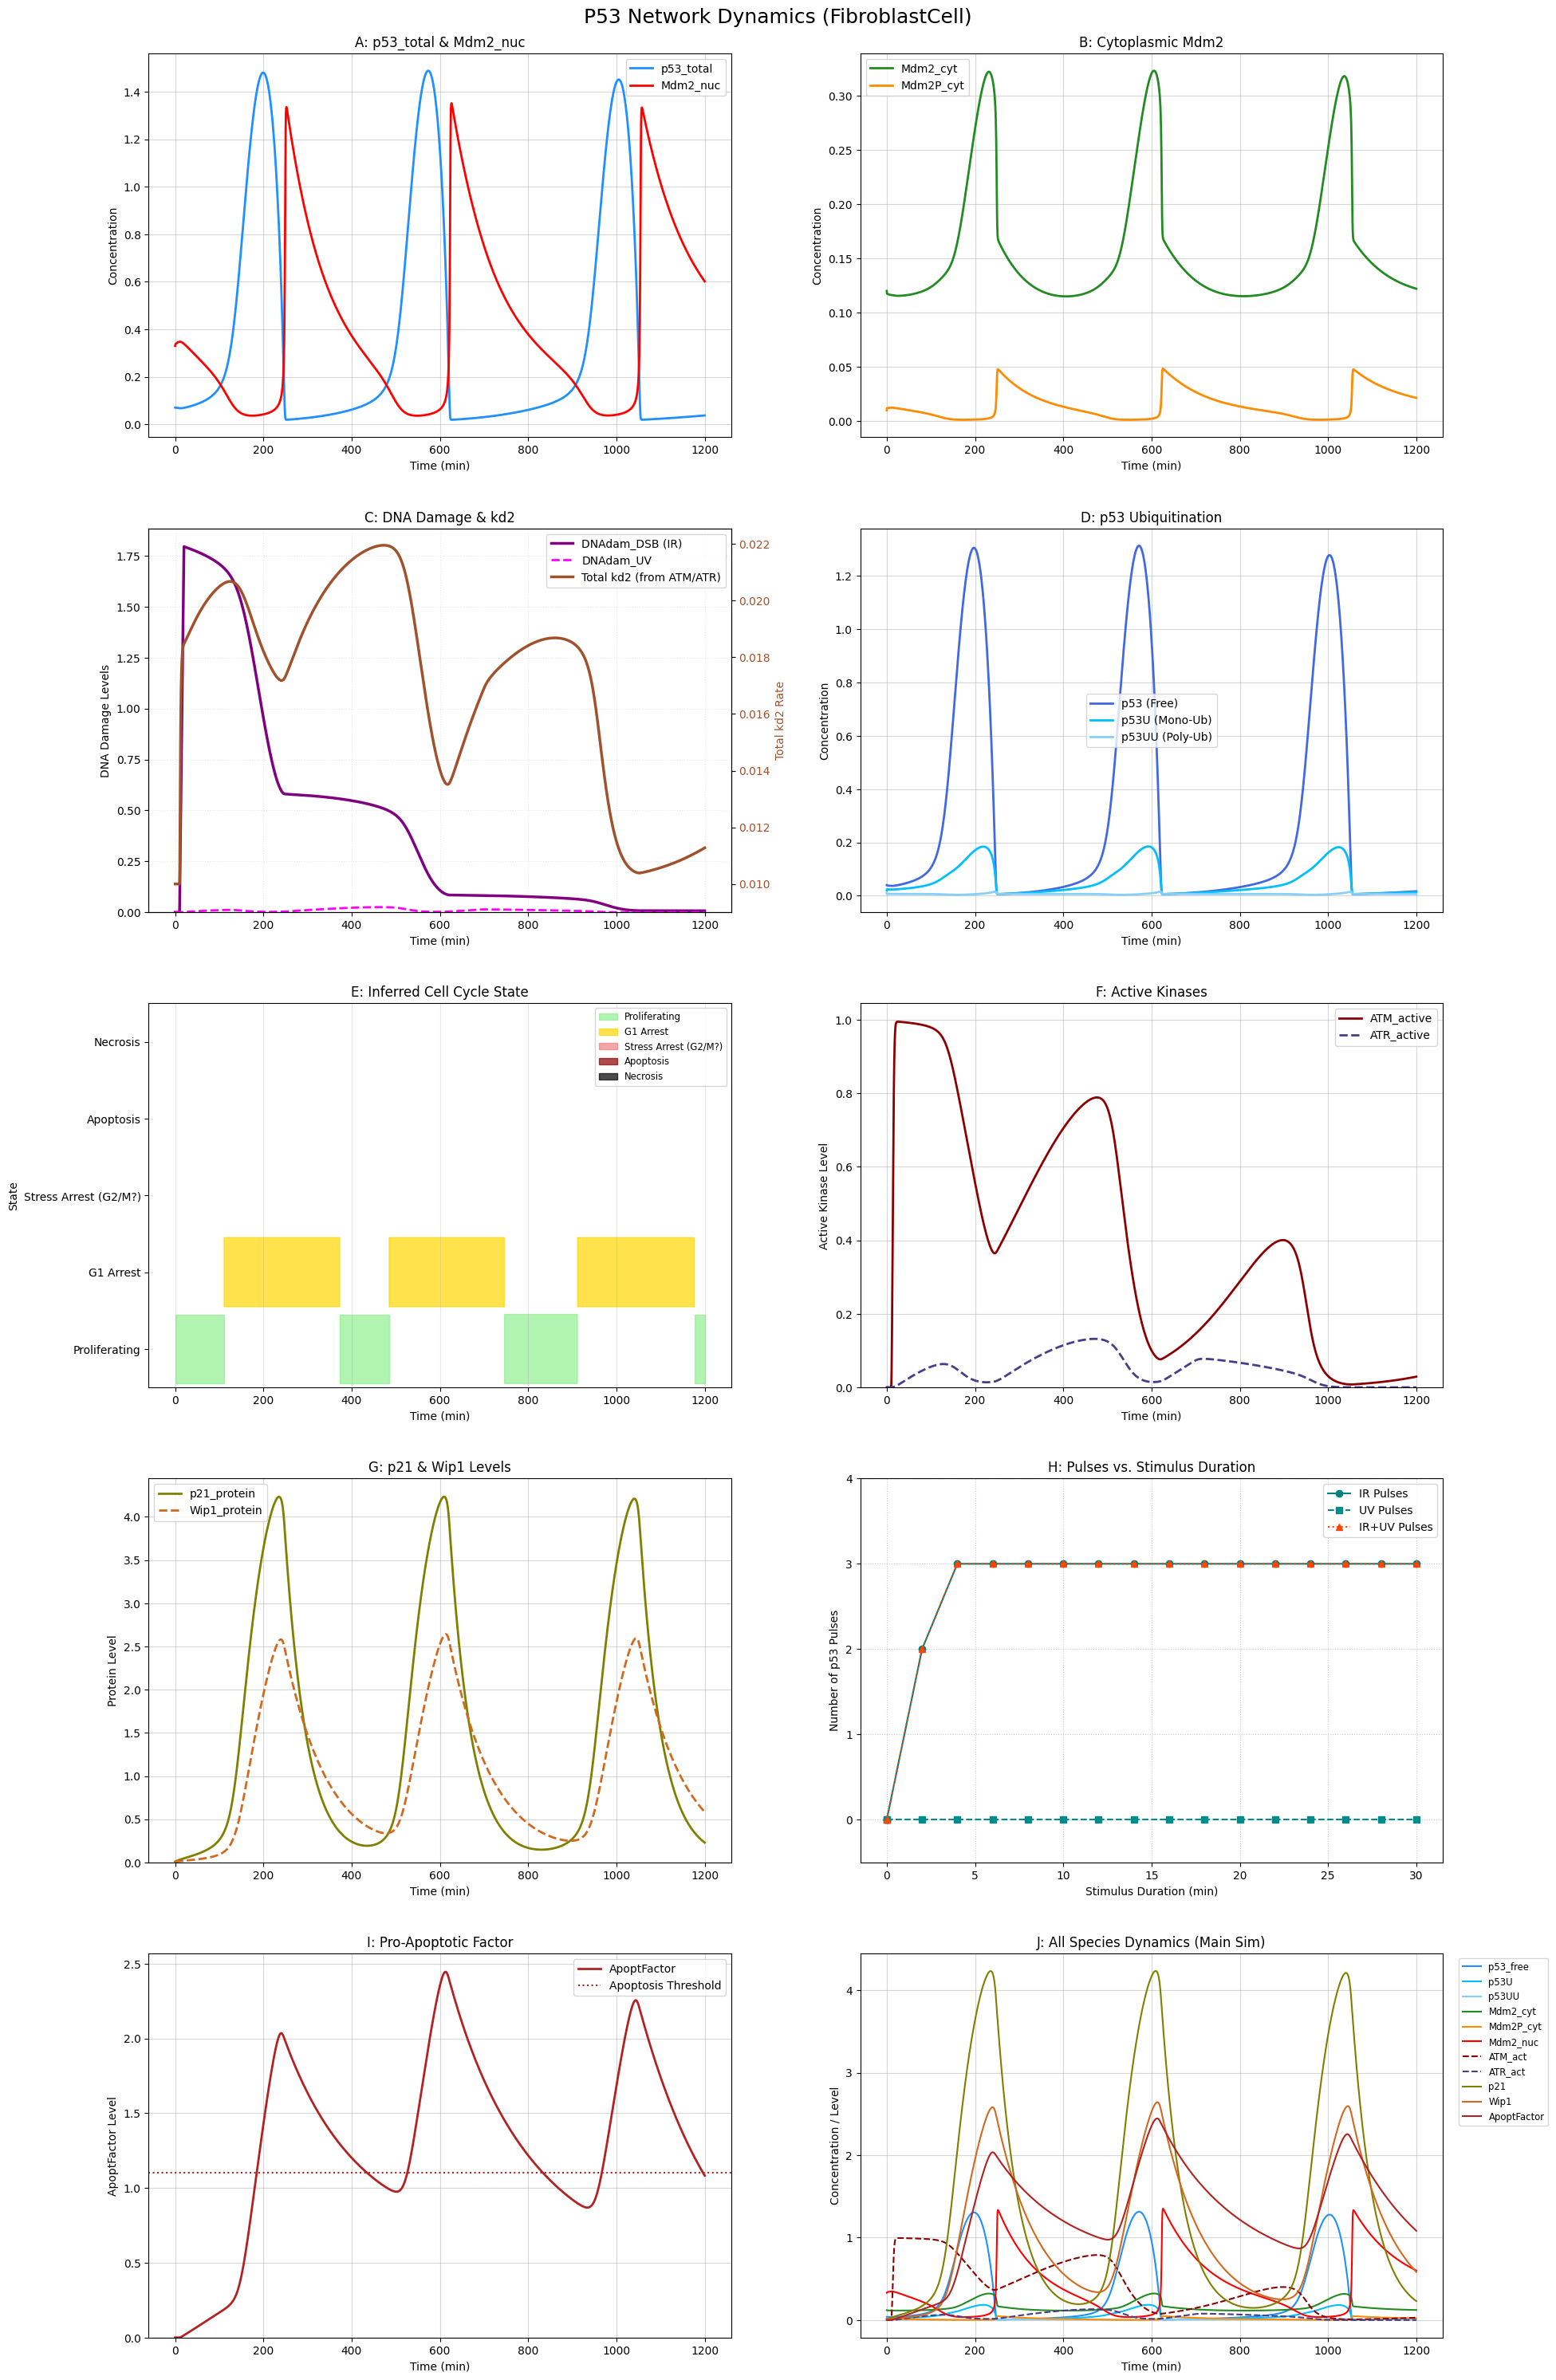

Environment Information:
UV Start: 10, UV End: 700, UV Amplitude: 0.001
IR Start: 10, IR End: 20, IR Amplitude: 1.0
Cell information (Main Simulation):
No apoptosis triggered in main simulation.


<Figure size 640x480 with 0 Axes>

Figure saved as 'p53_full_simulation_FibroblastCell.png'.
Running simulation with HepatocyteCell
An AdvancedCell model of a hepatocyte, reflecting high metabolic activity and regenerative potential. 
Balances robust DNA repair and apoptosis with capacity for cell cycle re-entry.


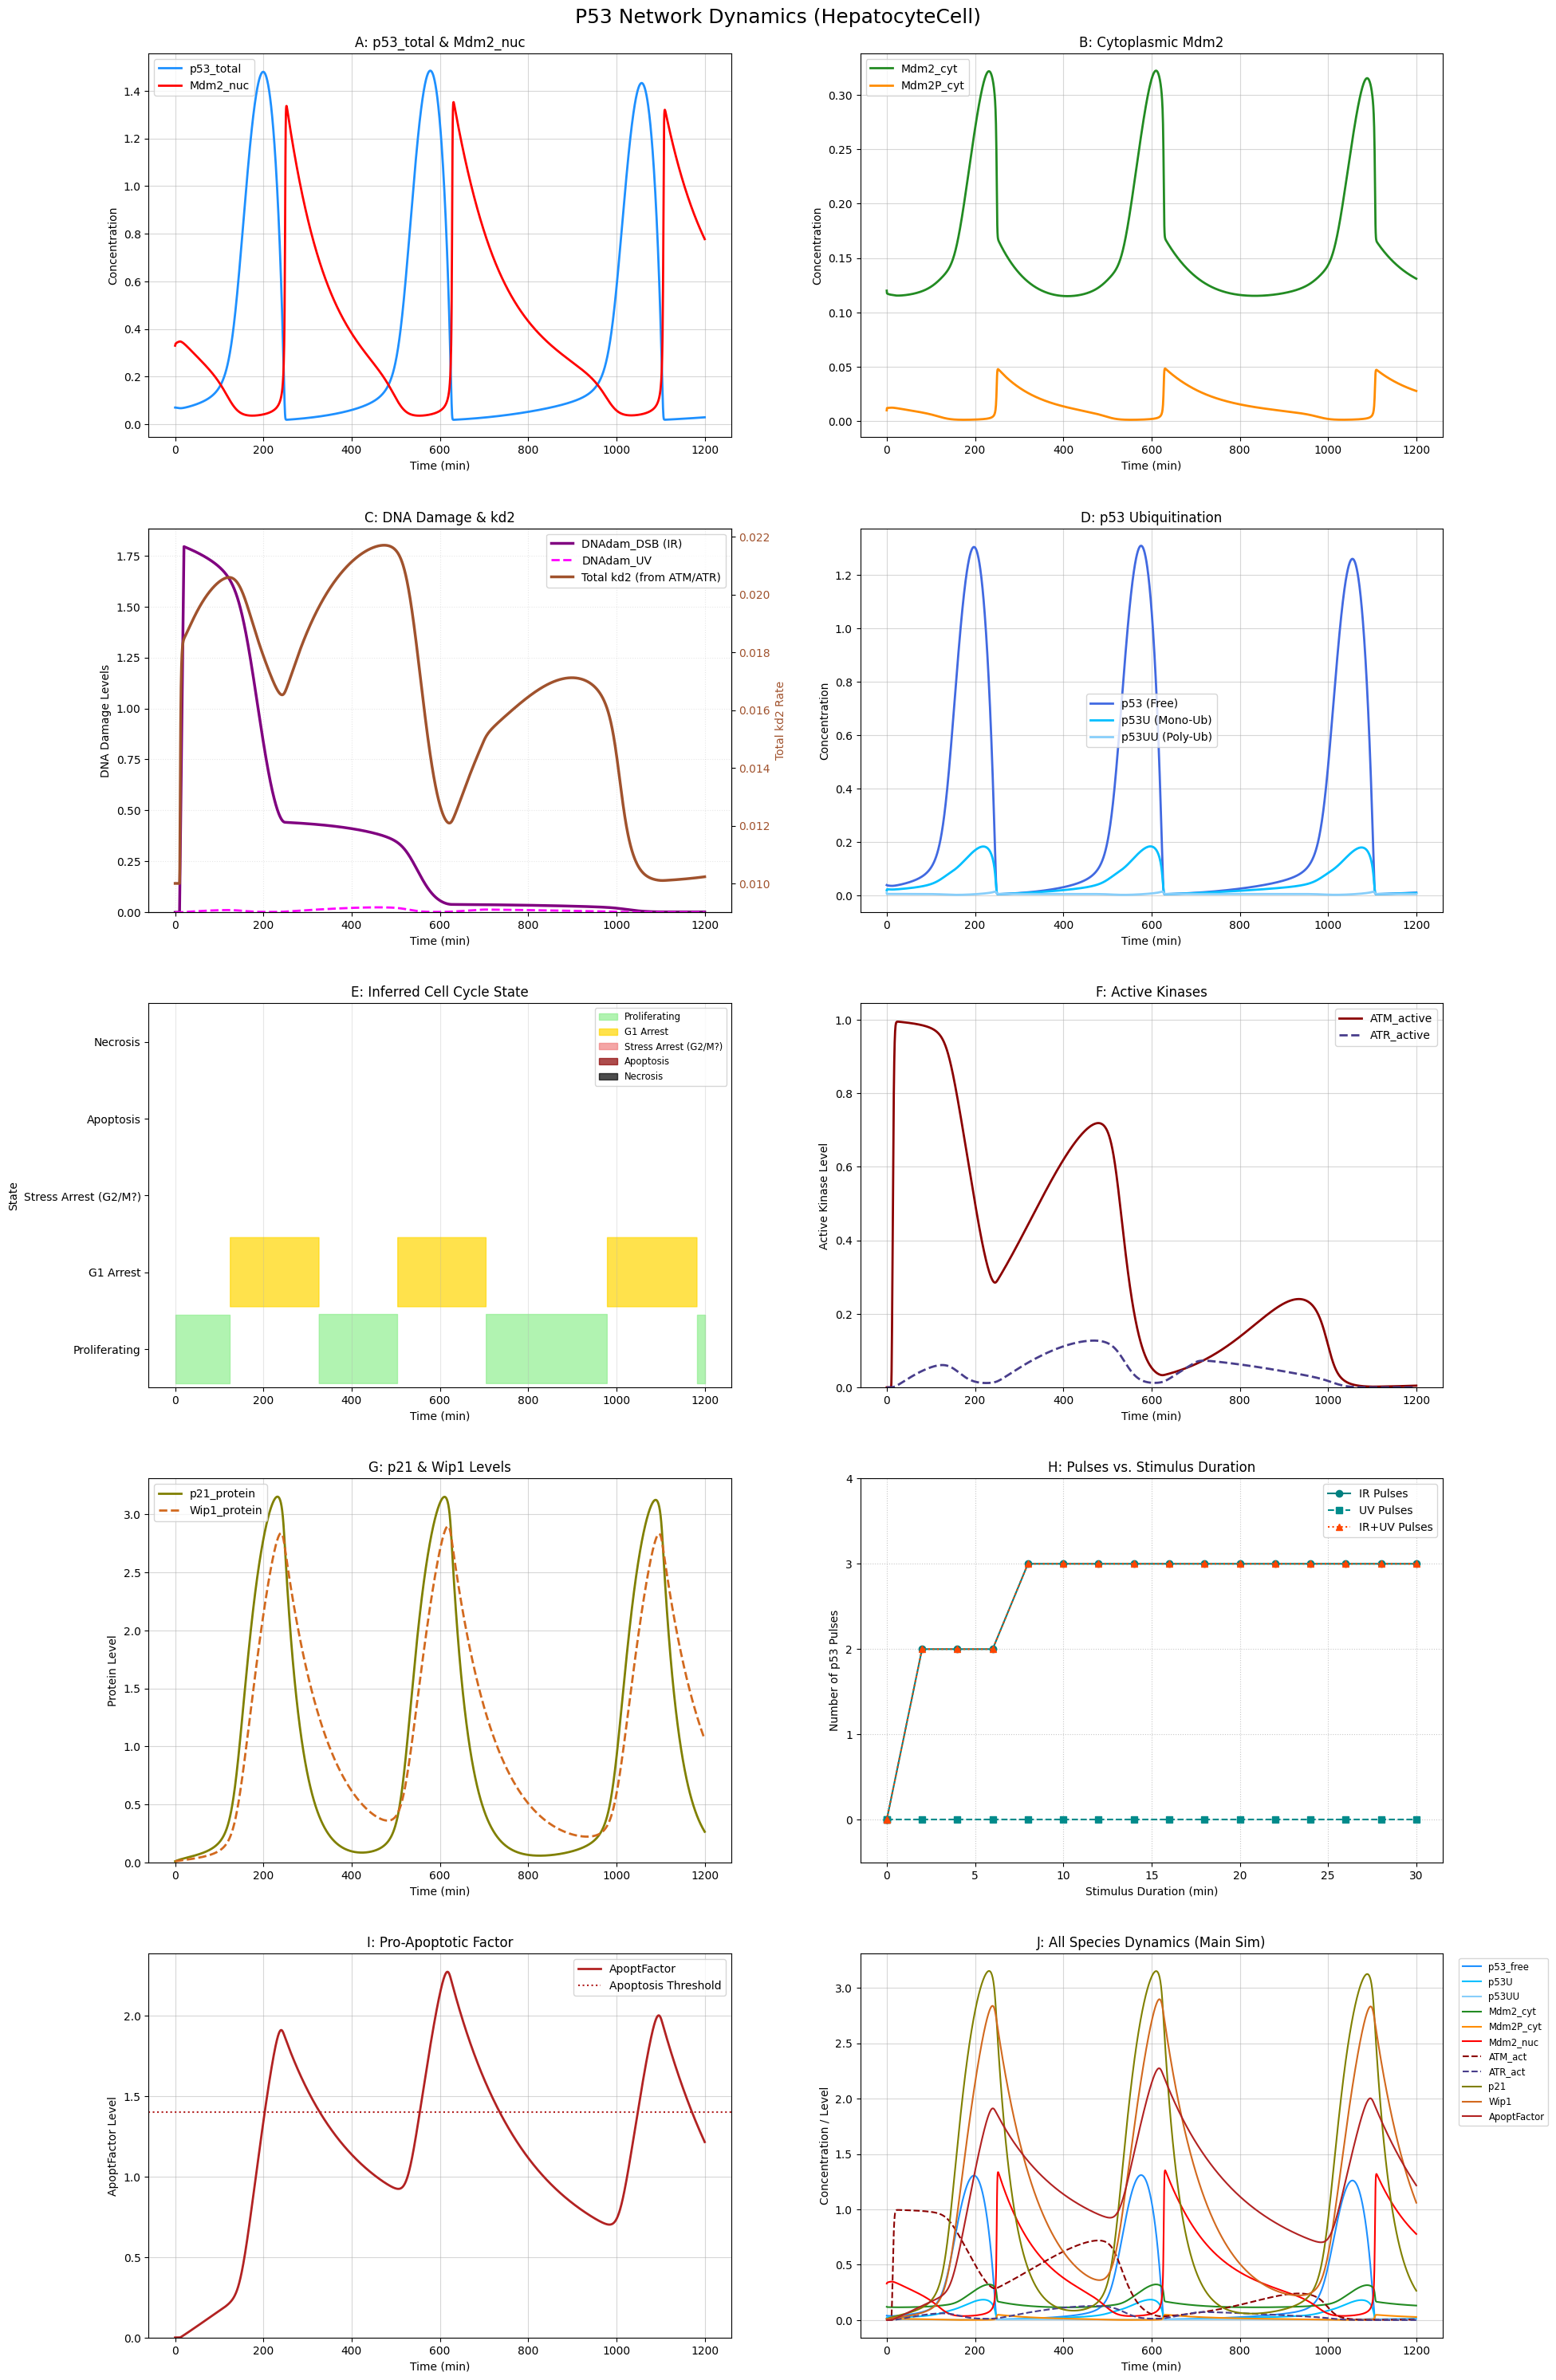

Environment Information:
UV Start: 10, UV End: 700, UV Amplitude: 0.001
IR Start: 10, IR End: 20, IR Amplitude: 1.0
Cell information (Main Simulation):
No apoptosis triggered in main simulation.


<Figure size 640x480 with 0 Axes>

Figure saved as 'p53_full_simulation_HepatocyteCell.png'.
Running simulation with NeuronCell
An AdvancedCell model of a post-mitotic neuron. p53 primarily governs survival versus apoptosis. 
Cell cycle arrest mechanisms via p21 are largely disabled.


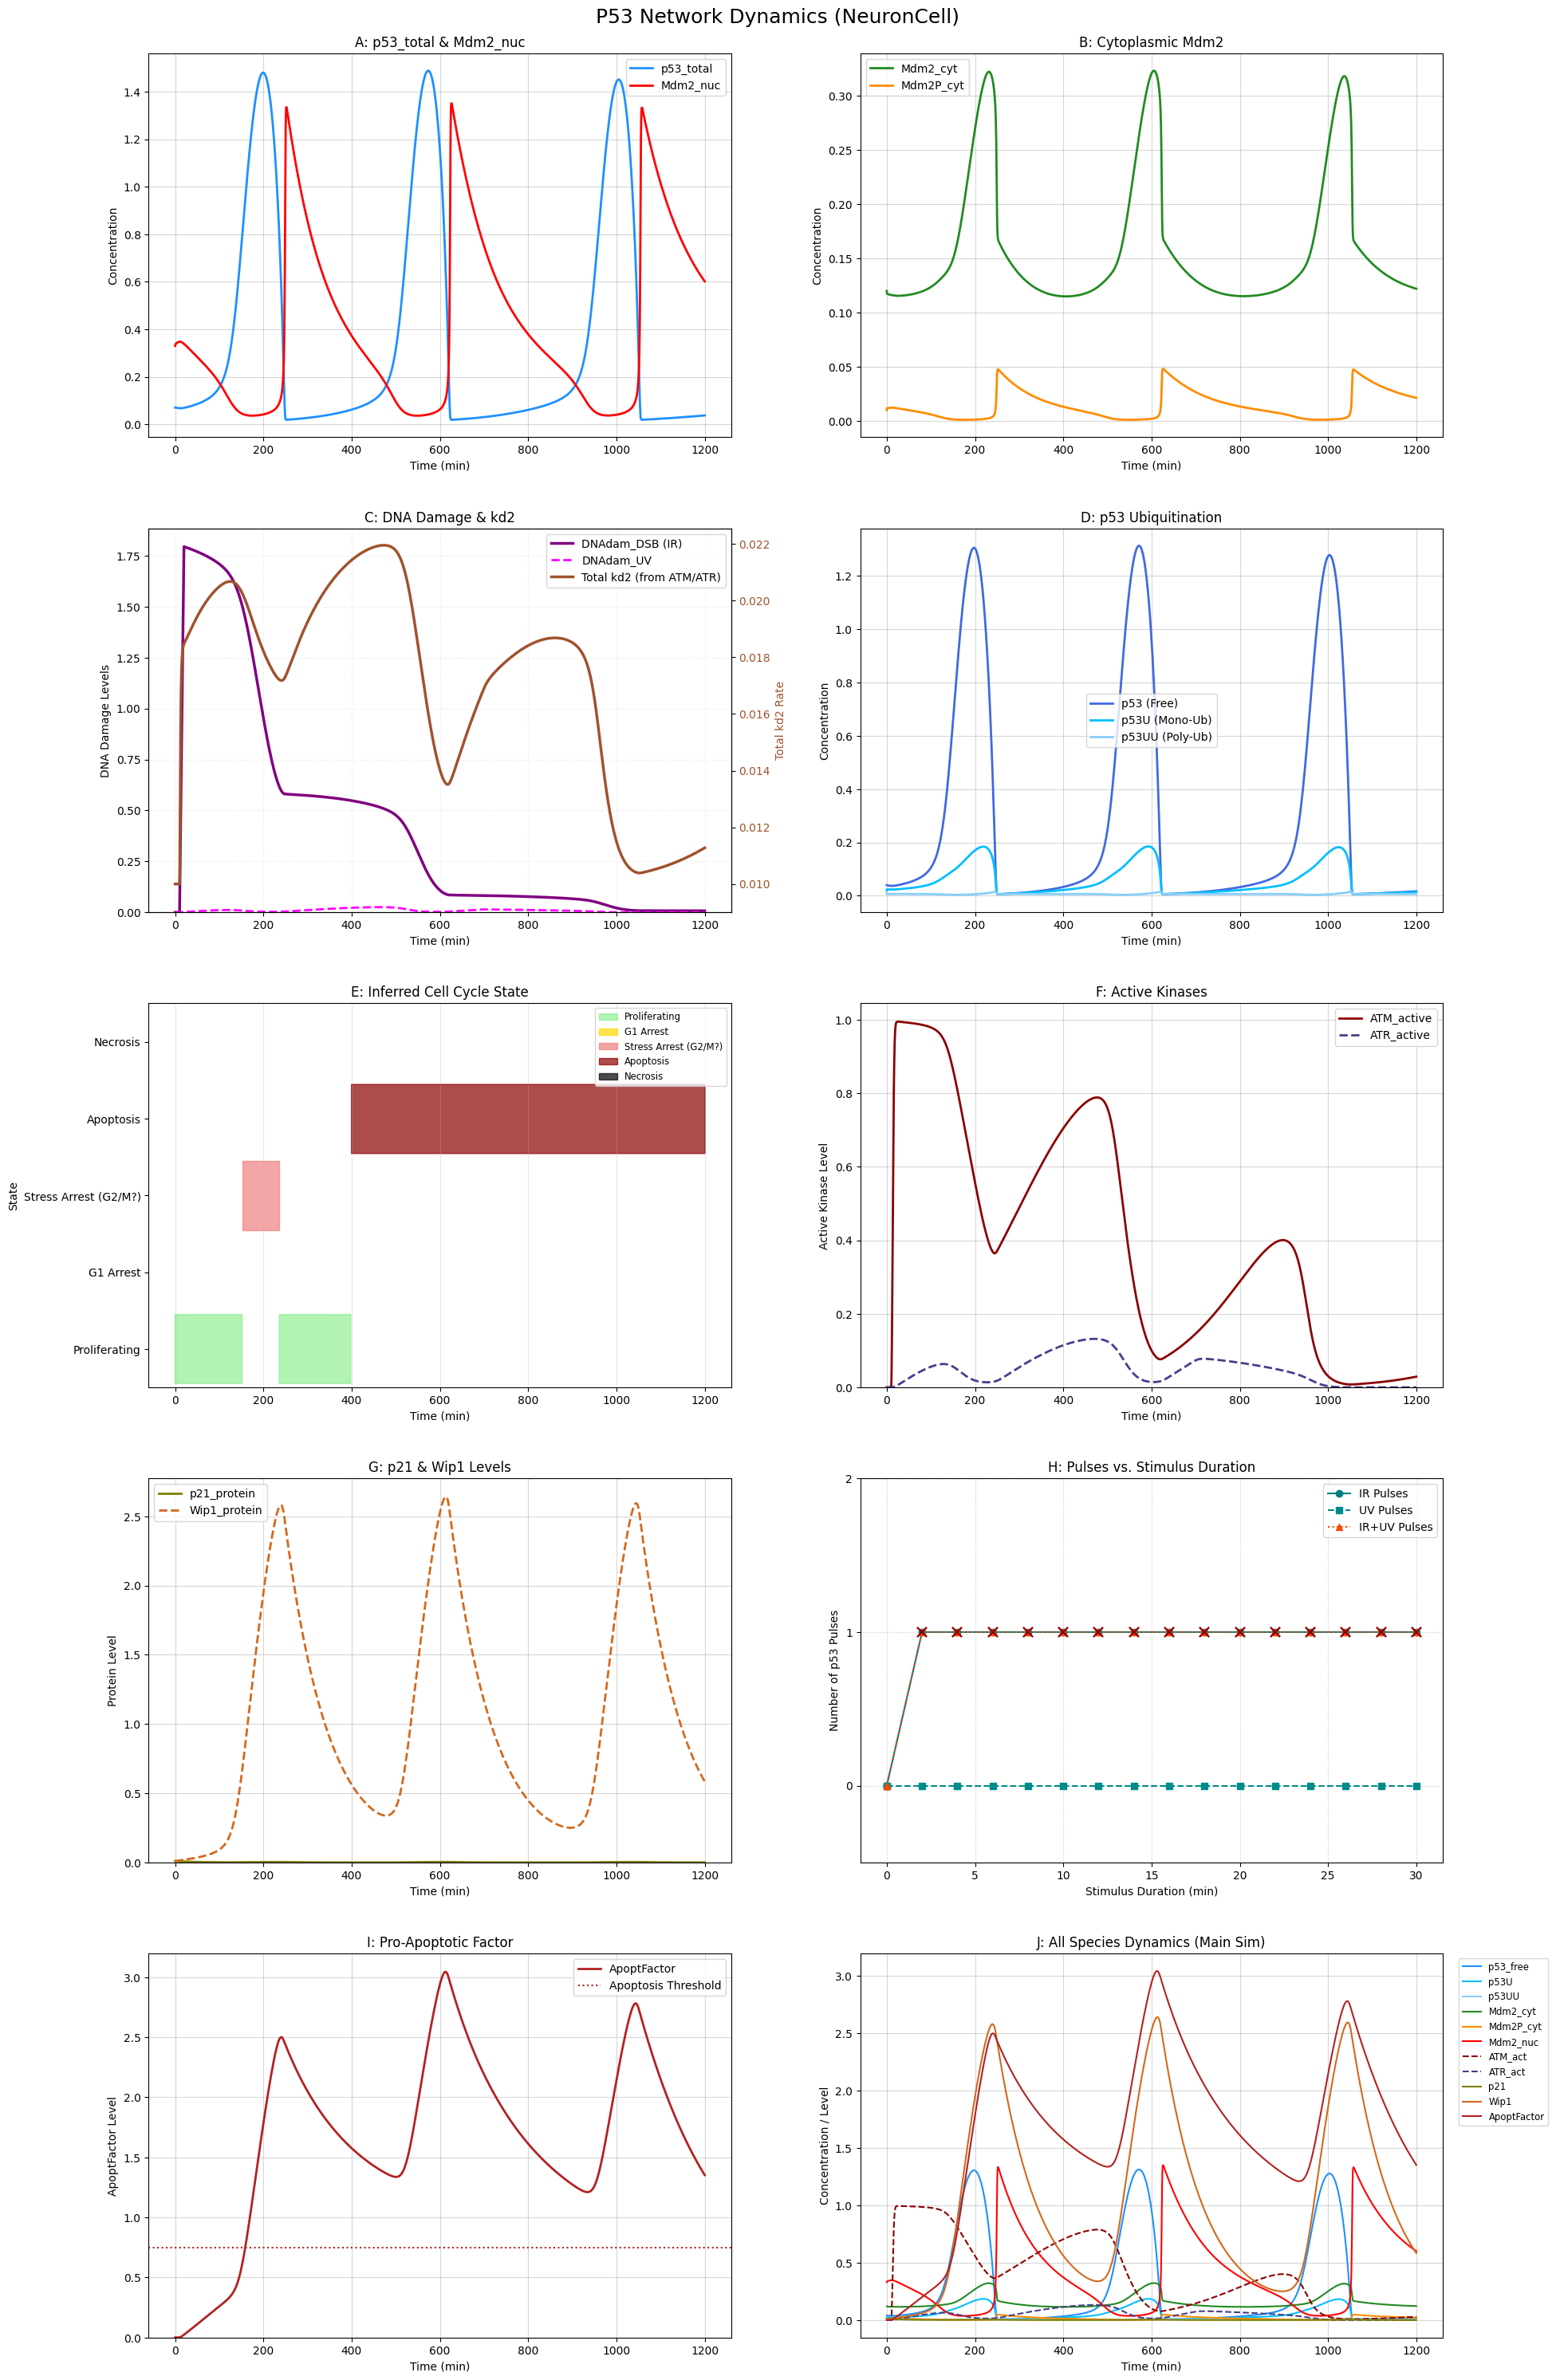

Environment Information:
UV Start: 10, UV End: 700, UV Amplitude: 0.001
IR Start: 10, IR End: 20, IR Amplitude: 1.0
Cell information (Main Simulation):
Apoptosis triggered at time: 398.50 minutes
Reason for apoptosis: Factor_duration_met


<Figure size 640x480 with 0 Axes>

Figure saved as 'p53_full_simulation_NeuronCell.png'.


In [8]:
ANALYZE = True
if ANALYZE:
    print("Running simulation with MonocyteCell")
    cell = MonocyteCell()
    env = AdvancedEnvironment()

    for row in cell.description:
        print(row)
    simulate(cell, env, y0_full_system)

    print("Running simulation with SenescentCell")
    cell = SenescentCell()
    env = AdvancedEnvironment()
    for row in cell.description:
        print(row)
    simulate(cell, env, y0_full_system)

    print("Running simulation with UVResistantCell")
    cell = UVResistantCell()
    env = AdvancedEnvironment()
    for row in cell.description:
        print(row)
    simulate(cell, env, y0_full_system)
    print("Running simulation with CancerCellp53Mutant")
    cell = CancerCellp53Mutant()
    env = AdvancedEnvironment()
    for row in cell.description:
        print(row)
    simulate(cell, env, y0_full_system)
    print("Running simulation with StemCellEmbryonic")
    cell = StemCellEmbryonic()
    env = AdvancedEnvironment()
    for row in cell.description:
        print(row)
    simulate(cell, env, y0_full_system)
    print("Running simulation with CancerCellRestoredp53")
    cell = CancerCellRestoredp53()
    env = AdvancedEnvironment()
    for row in cell.description:
        print(row)
    simulate(cell, env, y0_full_system)
    print("Running simulation with RadioresistantCancerCell")
    cell = RadioresistantCancerCell()
    env = AdvancedEnvironment()
    for row in cell.description:
        print(row)
    simulate(cell, env, y0_full_system)
    print("Running simulation with FibroblastCell")
    cell = FibroblastCell()
    env = AdvancedEnvironment()
    for row in cell.description:
        print(row)
    simulate(cell, env, y0_full_system)
    print("Running simulation with HepatocyteCell")
    cell = HepatocyteCell()
    env = AdvancedEnvironment()
    for row in cell.description:
        print(row)
    simulate(cell, env, y0_full_system)
    print("Running simulation with NeuronCell")
    cell = NeuronCell()
    env = AdvancedEnvironment()
    for row in cell.description:
        print(row)
    simulate(cell, env, y0_full_system)